# Flux Vision Data (Zone)

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl 
import seaborn as sns
# sns.set()
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1.2, color_codes=True, rc=None)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import geopandas as gpd
import geoplot as gpl
import json
import mapclassify


%matplotlib inline

In [ ]:
# read csv file

# pd.read_csv('../../data/export_csv/Flux_24h')
df = pd.read_csv('../../data/export_csv/Flux_24h.csv')#pd.read_csv('data/new/micro/Flux_24h.csv',sep = ';')
# df = df.groupby(by=['Date','Origin','Destination'], as_index=0).sum()

# # Date Conversion
# df['Date'] = pd.to_datetime(df['Date'])
# df['Date_day'] = df['Date'].dt.weekday

df

In [4]:
#Filter data for 3h only
df = df[(df.Immobility == '3h') & (df.Origin != 'Hors_Zone')]

In [5]:
list((df.groupby(by = 'Observation_Zone').groups.keys()))

['ASSANEF',
 'Arret Bakayaou',
 'Arret Centre hospitalier de Kintambo',
 'Arret Socimat',
 'Arret Stade Velodrome',
 'Arret Station Centre Superieur',
 'Arret Station Macampagne (ML)',
 'Arret moulard',
 'Avenue du Commerce et Kasa vubu',
 'Aéroport Ndjili',
 'Aéroport Ndolo',
 'BATETELA',
 'Baruti Tabernacle',
 'Benseke Nouvelle Cite',
 'Binza Arret Maternite',
 'CE TRINITE',
 'Carrigres',
 'Centre Evangelique Emmanuel Langa-langa',
 "Centre d'Evangelisation Peniel CEPE",
 'Cimetiere Kimbanseke',
 'Cimetiere Kintambo',
 'Cimetiere Mingadi',
 'Cimetiere Ndjili Brasserie',
 'Cimetiere sans fil',
 'Croissement Kianza et Universite',
 'DGC barre',
 'Dvin',
 'ECC/CEC/BUMBU',
 'Eglise Catholique Divin Maître',
 'Eglise Francophone Ecole de Tyrannus',
 'Eglise Kimbanguiste',
 'Eglise Notre Dame de Fatima',
 'Eglise Saint Paul',
 'Eglise des assemblées de dieu',
 'Eglise locale Cbfc Itaga',
 'Ejcev Nouvelle Alliance Bima',
 'FIKIN',
 'Food Market Macampagne',
 'Gabriella',
 'HOTEL DU GOUVERNE

In [6]:
list((df.groupby(by = 'Origin').groups.keys()))

['Aba',
 'Adi',
 'Alimbongo',
 'Angumu',
 'Ankoro',
 'Ariwara',
 'Aru',
 'Bafwasende',
 'Baka',
 'Banalia',
 'Banga Lubaka',
 'Bangabola',
 'Barumbu',
 'Basoko',
 'Bena Leka',
 'Bena Tshiadi',
 'Bengamisa',
 'Beni',
 'Bibanga',
 'Biena',
 'Bikoro',
 'Bilomba',
 'Binga',
 'Binza',
 'Binza Meteo',
 'Binza Ozone',
 'Birambizo',
 'Boende',
 'Boko',
 'Boko-Kivulu',
 'Bokoro',
 'Bolobo',
 'Bolomba',
 'Boma',
 'Boma Bungu',
 'Bominenge',
 'Bondo',
 'Bongandanga',
 'Bosondjo',
 'Bukama',
 'Bulungu',
 'Bumba',
 'Bumbu',
 'Bunia',
 'Bunkeya',
 'Bunkonde',
 'Bunyakiri',
 'Businga',
 'Buta',
 'Cilundu',
 'Demba',
 'Dibaya',
 'Dikungu',
 'Dilala',
 'Dilolo',
 'Diulu',
 'Djalo Djeka',
 'Djuma',
 'Drodro',
 'Dungu',
 'Feshi',
 'Fizi',
 'Fungurume',
 'Gbadolite',
 'Gemena',
 'Gethy',
 'Gombari',
 'Gombe',
 'Gungu',
 'Hauts-Plateaux',
 'Ibanda',
 'Idiofa',
 'Idjwi',
 'Ilebo',
 'Inga',
 'Isangi',
 'Isiro',
 'Itebero',
 'Itombwe',
 'Kabalo',
 'Kabambare',
 'Kabare',
 'Kabeya Kamuanga',
 'Kabinda',
 'Kabo

In [7]:
list((df.groupby(by = 'Destination').groups.keys()))

['Aba',
 'Adi',
 'Alimbongo',
 'Angumu',
 'Ankoro',
 'Ariwara',
 'Aru',
 'Bafwasende',
 'Baka',
 'Banalia',
 'Banga Lubaka',
 'Bangabola',
 'Barumbu',
 'Basoko',
 'Bena Leka',
 'Bena Tshiadi',
 'Bengamisa',
 'Beni',
 'Bibanga',
 'Biena',
 'Bikoro',
 'Bilomba',
 'Binga',
 'Binza',
 'Binza Meteo',
 'Binza Ozone',
 'Birambizo',
 'Boende',
 'Boko',
 'Boko-Kivulu',
 'Bokoro',
 'Bolobo',
 'Bolomba',
 'Boma',
 'Boma Bungu',
 'Bominenge',
 'Bondo',
 'Bongandanga',
 'Bosondjo',
 'Bukama',
 'Bulungu',
 'Bumba',
 'Bumbu',
 'Bunia',
 'Bunkeya',
 'Bunkonde',
 'Bunyakiri',
 'Businga',
 'Buta',
 'Cilundu',
 'Demba',
 'Dibaya',
 'Dikungu',
 'Dilala',
 'Dilolo',
 'Diulu',
 'Djalo Djeka',
 'Djuma',
 'Drodro',
 'Dungu',
 'Feshi',
 'Fizi',
 'Fungurume',
 'Gbadolite',
 'Gemena',
 'Gethy',
 'Gombari',
 'Gombe',
 'Gungu',
 'Hauts-Plateaux',
 'Ibanda',
 'Idiofa',
 'Idjwi',
 'Ilebo',
 'Inga',
 'Isangi',
 'Isiro',
 'Itebero',
 'Itombwe',
 'Kabalo',
 'Kabambare',
 'Kabare',
 'Kabeya Kamuanga',
 'Kabinda',
 'Kabo

## Checking for null and missing values

In [8]:
df[(df.Volume.isnull())|(df.Volume.isna())]

Empty DataFrame
Columns: [Date, Origin, Destination, Immobility, Home_Category, Activity_Category, Observation_Zone, Mode, Volume, Date_day]
Index: []

In [9]:
df[(df.Date.isnull())|(df.Date.isna())]

Empty DataFrame
Columns: [Date, Origin, Destination, Immobility, Home_Category, Activity_Category, Observation_Zone, Mode, Volume, Date_day]
Index: []

In [10]:
df[(df.Origin.isnull())|(df.Origin.isna())]

Empty DataFrame
Columns: [Date, Origin, Destination, Immobility, Home_Category, Activity_Category, Observation_Zone, Mode, Volume, Date_day]
Index: []

In [11]:
df[(df.Destination.isnull())|(df.Destination.isna())]

Empty DataFrame
Columns: [Date, Origin, Destination, Immobility, Home_Category, Activity_Category, Observation_Zone, Mode, Volume, Date_day]
Index: []

In [12]:
df[df.duplicated()]

Empty DataFrame
Columns: [Date, Origin, Destination, Immobility, Home_Category, Activity_Category, Observation_Zone, Mode, Volume, Date_day]
Index: []

In [13]:
df = df.drop_duplicates()
df

Date   Origin Destination Immobility  \
5        2020-02-01      Aba     Gombari         3h   
6        2020-02-01      Aba     Gombari         3h   
7        2020-02-01      Aba     Gombari         3h   
8        2020-02-01      Aba     Gombari         3h   
9        2020-02-01      Aba     Gombari         3h   
...             ...      ...         ...        ...   
21012795 2020-08-11  Yangala  Mwene Ditu         3h   
21012796 2020-08-11  Yangala  Mwene Ditu         3h   
21012800 2020-08-11    Zongo     Tandala         3h   
21012801 2020-08-11    Zongo     Tandala         3h   
21012802 2020-08-11    Zongo     Tandala         3h   

                      Home_Category        Activity_Category Observation_Zone  \
5                  Outside_Resident           Outside_Worker      ZoneGlobale   
6                  Outside_Resident  Destination_Zone_Worker      ZoneGlobale   
7                  Outside_Resident        Study_Zone_Worker      ZoneGlobale   
8                  Outside_Resident       Origin_Zone_Worker      ZoneGlobale   
9         Destination_Zone_Resident           Outside_Worker      ZoneGlobale   
...                             ...                      ...              ...   
21012795       Origin_Zone_Resident        Study_Zone_Worker      ZoneGlobale   
21012796       Origin_Zone_Resident       Origin_Zone_Worker      ZoneGlobale   
21012800           Outside_Resident           Outside_Worker      ZoneGlobale   
21012801           Outside_Resident       Origin_Zone_Worker      ZoneGlobale   
21012802  Destination_Zone_Resident  Destination_Zone_Worker      ZoneGlobale   

               Mode  Volume  Date_day  
5         All_modes    5957         5  
6         All_modes    1985         5  
7         All_modes     871         5  
8         All_modes    1985         5  
9         All_modes    1985         5  
...             ...     ...       ...  
21012795  All_modes    7597         1  
21012796  All_modes   12662         1  
21012800  All_modes    3656         1  
21012801  All_modes    1208         1  
21012802  All_modes    4835         1  

[8907464 rows x 10 columns]

In [14]:
df[df.duplicated()]

Empty DataFrame
Columns: [Date, Origin, Destination, Immobility, Home_Category, Activity_Category, Observation_Zone, Mode, Volume, Date_day]
Index: []

In [15]:
df.describe()

Volume      Date_day
count  8.907464e+06  8.907464e+06
mean   4.884829e+02  2.944493e+00
std    2.694930e+03  1.988421e+00
min    2.100000e+01  0.000000e+00
25%    2.600000e+01  1.000000e+00
50%    5.300000e+01  3.000000e+00
75%    1.920000e+02  5.000000e+00
max    1.835530e+05  6.000000e+00

In [17]:
df_g = df[df.Observation_Zone == 'ZoneGlobale'].groupby(by=['Date','Origin','Destination','Observation_Zone','Date_day'], as_index=0).sum()
df_g

Date     Origin Destination Observation_Zone  Date_day  Volume
0      2020-02-01        Aba     Gombari      ZoneGlobale         5   32953
1      2020-02-01        Aba       Watsa      ZoneGlobale         5   19855
2      2020-02-01        Adi         Aru      ZoneGlobale         5     293
3      2020-02-01  Alimbongo        Beni      ZoneGlobale         5      36
4      2020-02-01  Alimbongo       Katwa      ZoneGlobale         5     237
...           ...        ...         ...              ...       ...     ...
507244 2020-08-11    Yangala       Luiza      ZoneGlobale         1     281
507245 2020-08-11    Yangala      Luputa      ZoneGlobale         1    1097
507246 2020-08-11    Yangala     Masuika      ZoneGlobale         1   11839
507247 2020-08-11    Yangala  Mwene Ditu      ZoneGlobale         1   77690
507248 2020-08-11      Zongo     Tandala      ZoneGlobale         1    9699

[507249 rows x 6 columns]

## Total flux visualization

In [27]:
df_total_flux = df_g.groupby(by=['Date','Date_day'], as_index=0).sum()

df_total_flux['Date_type'] = df_total_flux['Date_day'].apply(lambda x: 'WE' if (x == 5 or x == 6) else 'JO')

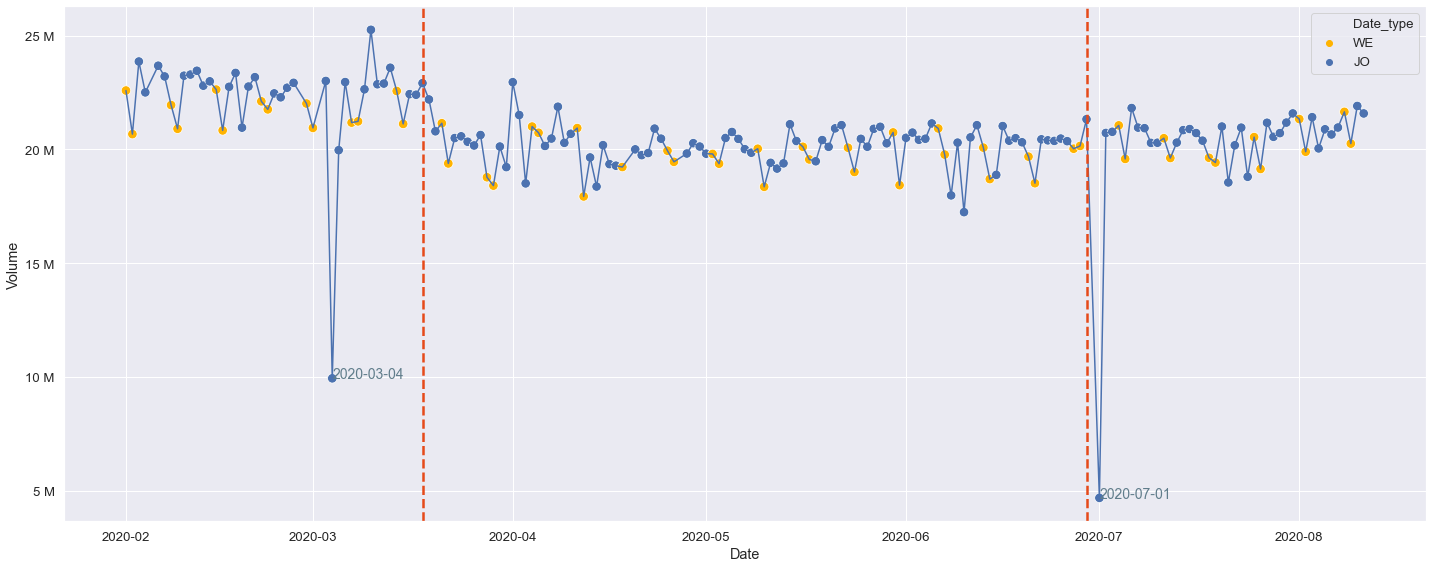

In [30]:
# fig = plt.figure(figsize=(20,10))
# ax = sns.lineplot(x='Date',y='Volume',data=df_total_flux)

# # ax.set_xticklabels(labels = df_total_flux['Date'], rotation=90)
# # ax.
# ax.axvline('2020-03-18',ymin = 0, ymax = 1,color = 'r')
# # ax.axvline('2020-06-10',ymin = 0, ymax = 1,color = 'r')
# # ax.set_xticklabels(labels=,rotation=45)
# # plt.xlim(0)
# ax.yaxis.set_major_formatter(ticker.EngFormatter())
# plt.tight_layout()
# plt.show()


fig = plt.figure(figsize=(20,8))
ax = sns.lineplot(x='Date',y='Volume',data=df_total_flux)

# ax.set_xticklabels(labels = df_total_flux['Date'], rotation=90)
# ax.

sns.scatterplot(x='Date',y='Volume',data=df_total_flux, hue = 'Date_type', ax =ax, palette = ['#ffb300','b'],s = 90)




ax.axvline('2020-03-18',ymin = 0, ymax = 1,color = '#e64a19', ls = '--',lw=2.5)

ax.axvline('2020-06-29',ymin = 0, ymax = 1,color = '#e64a19', ls = '--',lw=2.5)

# ax.axvline('2020-03-04',ymin = 0, ymax = 1,color = '#ffab00', ls = '--')

# ax.axvline('2020-07-01',ymin = 0, ymax = 1,color = '#ffab00', ls = '--')

style = dict(size=14, color='#607d8b')

for d in ['2020-07-01','2020-03-04']:
    ax.text(d,df_total_flux[df_total_flux.Date == d]['Volume'] , d, **style)

# ax.axvline('2020-06-10',ymin = 0, ymax = 1,color = 'r')
ax.yaxis.set_major_formatter(ticker.EngFormatter())
# ax.set_xticklabels(labels=,rotation=45)
# plt.xlim(0)


plt.tight_layout()
plt.show()

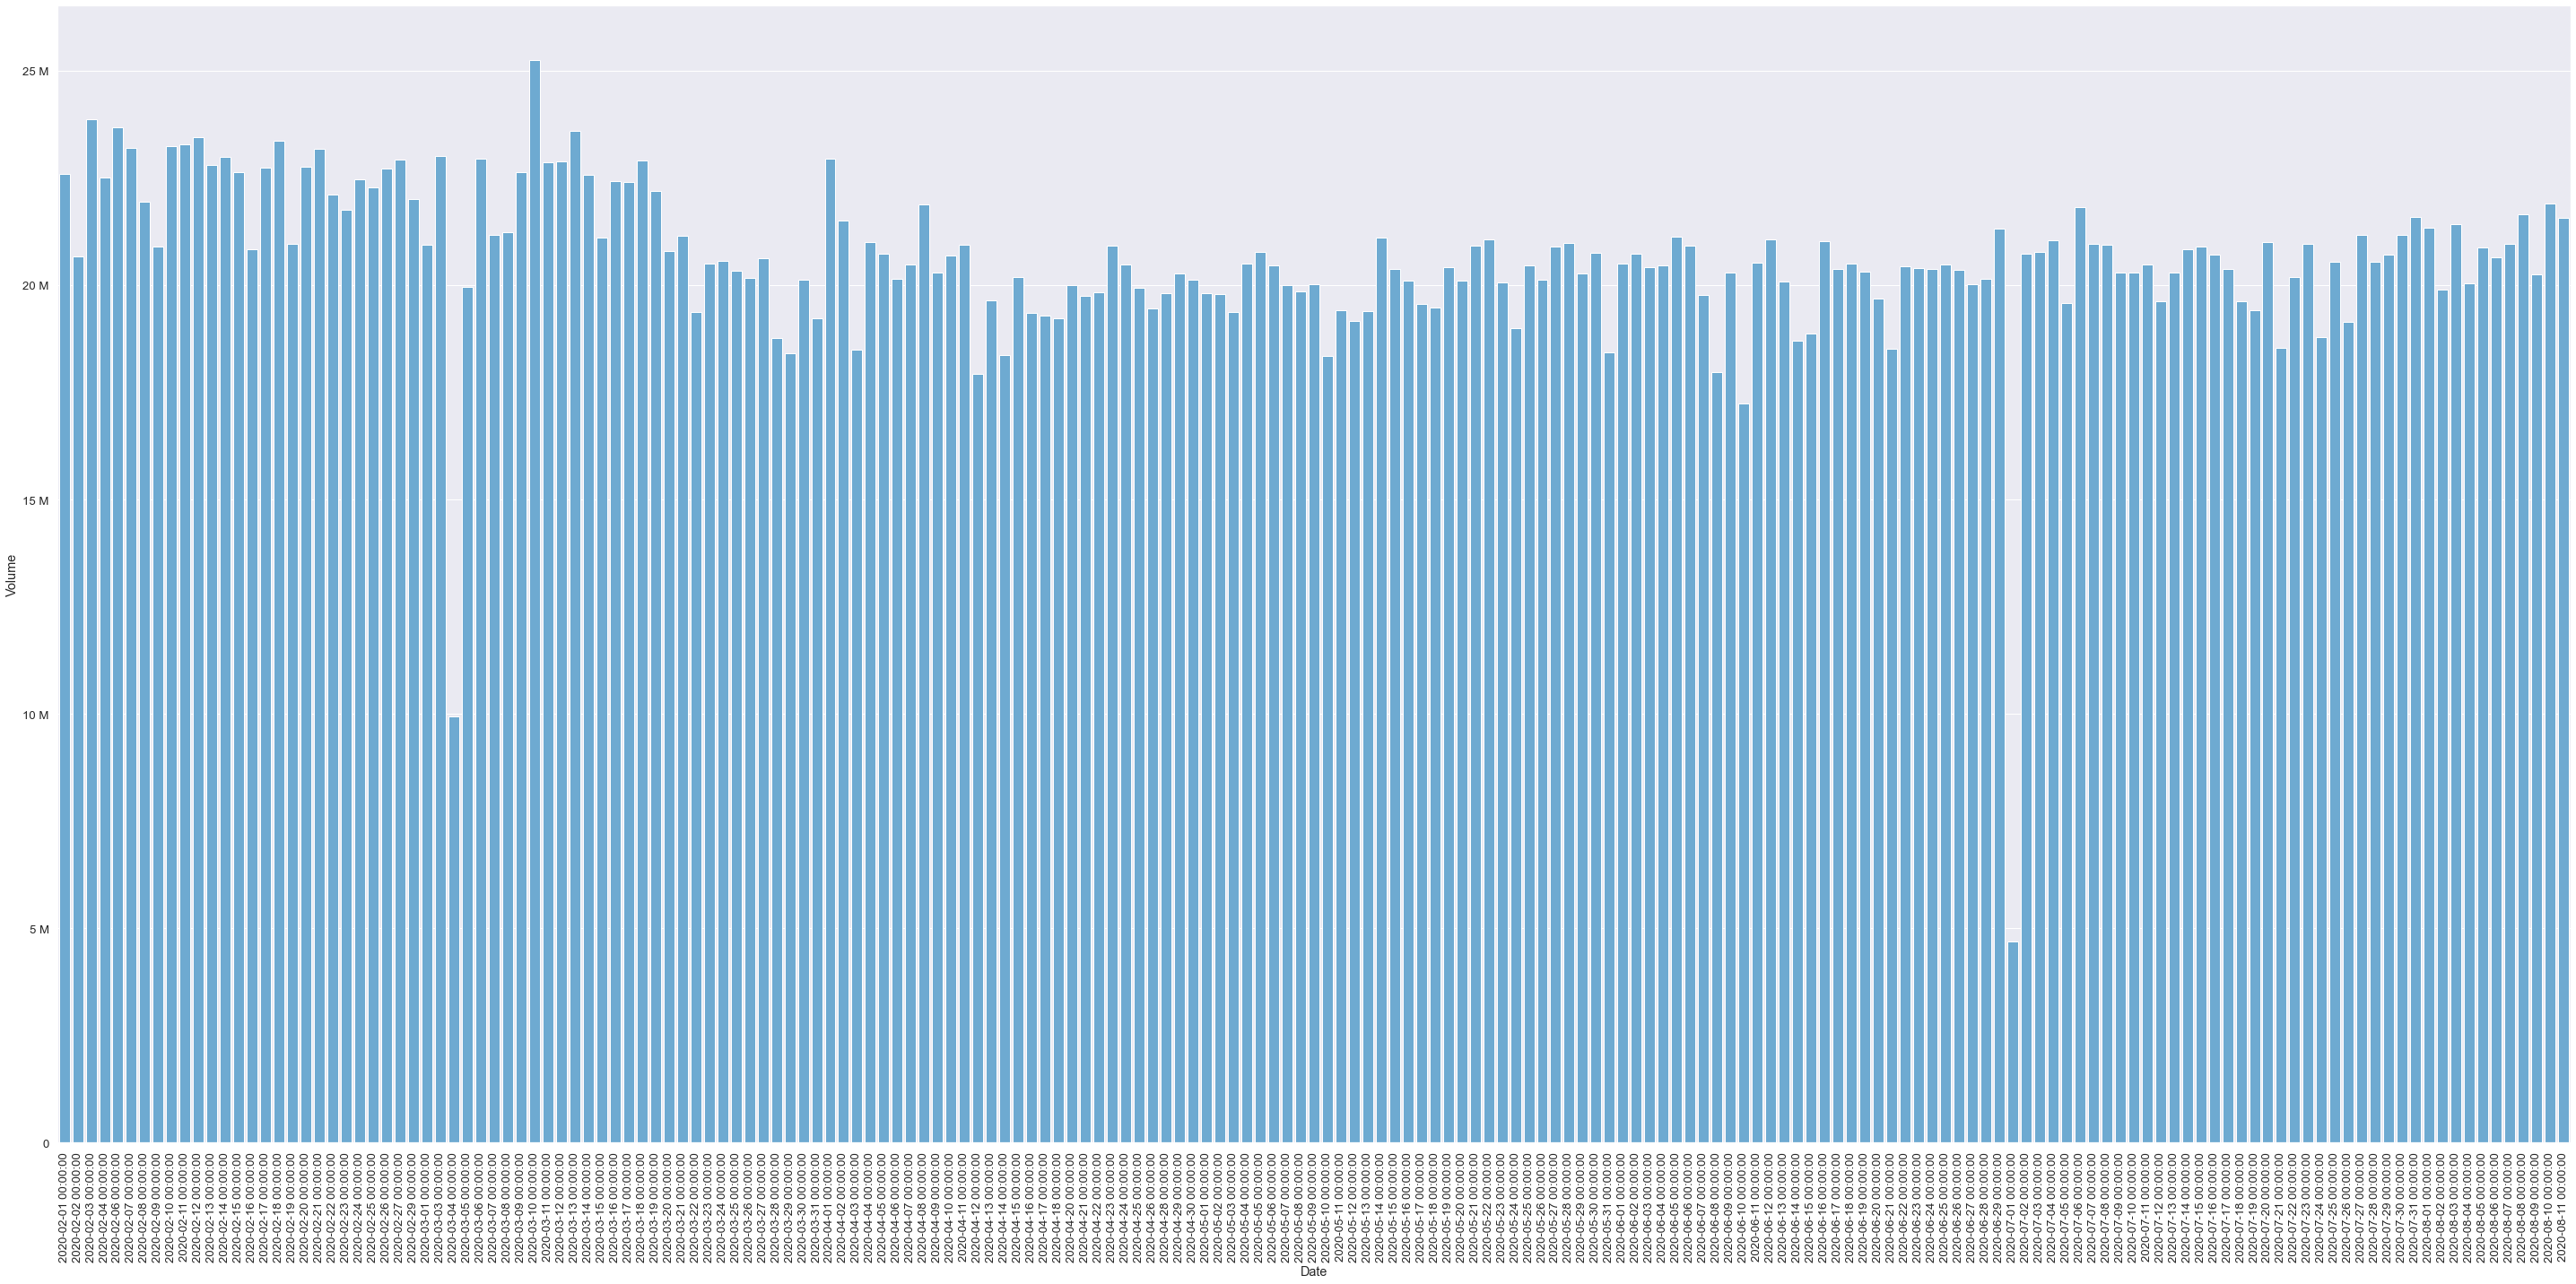

In [31]:
fig = plt.figure(figsize=(40,20))

ax = sns.barplot(x='Date',y='Volume',data=df_total_flux,palette=['#5DADE2'])

# sns.barplot(x='Date',y='Volume',data=df_total_flux[df_total_flux.Date>='2020-06-29'],palette=['#5DADE2'])

# ax.axvline('2020-03-18',ymin = 0, ymax = 1,color = 'r')
ax.set_xticklabels(labels = df_total_flux['Date'], rotation=90)
# ax.

# ax.axvline('2020-06-10',ymin = 0, ymax = 1,color = 'r')
# ax.set_xticklabels(labels=,rotation=45)
# plt.xlim(0)
ax.yaxis.set_major_formatter(ticker.EngFormatter())
plt.tight_layout()
plt.show()

In [32]:
#read Geo Data
# ./data/GEO DRC/RDC_Micro_ZonesDeSante_Regroupees.shp
zone_gd =gpd.read_file('../../data/GEO DRC/RDC_Micro_ZonesDeSante_Regroupees.shp')
zone_gd

Index        C0        C1   Surface     PROVINCE Zone+Peupl  \
0      231  0.357866  0.014489  33881.01   Sud-Ubangi    Tandala   
1      230  0.386971  0.023376    762.28   Sud-Ubangi      Zongo   
2      363  0.482317  0.117910  12679.67  Nord-Ubangi       Bili   
3      233  0.624055  0.264078   1251.62  Nord-Ubangi  Gbadolite   
4      159  0.329985  0.008398  21860.94  Nord-Ubangi       Loko   
..     ...       ...       ...       ...          ...        ...   
310    336  0.360842  0.124134   5558.60        Ituri        Aru   
311    340  0.647995  0.181076   1153.12        Ituri        Adi   
312    338  0.715352  0.264651   3159.19        Ituri    Ariwara   
313    335  0.471356  0.116512  12960.34    Haut-Uele        Aba   
314    346  0.492376  0.096703  19432.93    Haut-Uele      Dungu   

                                              geometry  
0    POLYGON ((18.68941 1.90628, 18.68649 1.90233, ...  
1    POLYGON ((18.67816 3.97665, 18.66909 3.96872, ...  
2    POLYGON ((19.42578 3.89935, 19.41802 3.89628, ...  
3    POLYGON ((20.86461 4.06245, 20.86071 4.06242, ...  
4    POLYGON ((21.35464 3.39852, 21.35367 3.39739, ...  
..                                                 ...  
310  POLYGON ((30.65123 2.14049, 30.65002 2.13740, ...  
311  POLYGON ((30.78577 3.29087, 30.77890 3.29006, ...  
312  POLYGON ((30.45461 2.91338, 30.43551 2.91118, ...  
313  POLYGON ((30.20675 2.59240, 30.18471 2.58432, ...  
314  POLYGON ((28.56956 2.81148, 28.56590 2.80066, ...  

[315 rows x 7 columns]

In [33]:
zone_filtered_gd = zone_gd[zone_gd['PROVINCE'] == 'Kinshasa']
zone_filtered_gd

Index        C0        C1  Surface  PROVINCE       Zone+Peupl  \
44    150  0.696706  0.227939   129.83  Kinshasa  Mont Ngafula II   
49    152  0.743083  0.375349   828.67  Kinshasa            Nsele   
50    126  0.634018  0.415307   403.16  Kinshasa   Mont Ngafula I   
51    147  0.679085  0.303660    48.15  Kinshasa      Binza Meteo   
52    139  0.545393  0.270582     5.18  Kinshasa           Makala   
53    142  0.642833  0.316181    20.24  Kinshasa         Selembao   
54    131  0.501886  0.284796    15.67  Kinshasa          Kisenso   
55    129  0.717995  0.317754    16.66  Kinshasa            Lemba   
56    130  0.631862  0.374906     4.74  Kinshasa           Matete   
57    125  0.626042  0.304076     9.09  Kinshasa           Ndjili   
58    155  0.559614  0.328054    27.30  Kinshasa       Kimbanseke   
59    127  0.530997  0.391604   238.15  Kinshasa           Kikimi   
60    473  0.634172  0.229627    33.70  Kinshasa        Masina II   
61    143  0.604435  0.322328    14.55  Kinshasa         Masina I   
62    369  0.701169  0.348933    17.39  Kinshasa         Kingabwa   
63    137  0.670063  0.265780     3.53  Kinshasa         Kalamu I   
64    135  0.757594  0.234495    12.47  Kinshasa           Limete   
65    133  0.658129  0.237416     4.24  Kinshasa          Barumbu   
66    134  0.647459  0.277446     3.02  Kinshasa         Kinshasa   
67    136  0.733176  0.306315     2.47  Kinshasa        Kalamu II   
68    145  0.642602  0.208008     3.81  Kinshasa        Kasa-Vubu   
69    132  0.621335  0.199109     2.72  Kinshasa           Police   
70    467  0.739564  0.189460    12.73  Kinshasa            Gombe   
71    175  0.654248  0.318059     7.20  Kinshasa           Kokolo   
72    146  0.645281  0.340095     3.04  Kinshasa      Ngiri-Ngiri   
73    138  0.607124  0.319825     4.37  Kinshasa            Bumbu   
74    144  0.552859  0.275995     4.01  Kinshasa         Kintambo   
75    148  0.813409  0.234393    21.16  Kinshasa      Binza Ozone   
76    352  0.610482  0.067564  8793.41  Kinshasa         Maluku I   

                                             geometry  
44  POLYGON ((15.17375 -4.52650, 15.17299 -4.52693...  
49  POLYGON ((15.59596 -4.60264, 15.58248 -4.60648...  
50  POLYGON ((15.34778 -4.64765, 15.34653 -4.64782...  
51  POLYGON ((15.25526 -4.44355, 15.25471 -4.44424...  
52  POLYGON ((15.29708 -4.40185, 15.29672 -4.40227...  
53  POLYGON ((15.25947 -4.44261, 15.25873 -4.44266...  
54  POLYGON ((15.35963 -4.44029, 15.35962 -4.44033...  
55  POLYGON ((15.30841 -4.43843, 15.30785 -4.43851...  
56  POLYGON ((15.35452 -4.39658, 15.34441 -4.39741...  
57  POLYGON ((15.37657 -4.42529, 15.37592 -4.42557...  
58  POLYGON ((15.35618 -4.48471, 15.35581 -4.48498...  
59  POLYGON ((15.48592 -4.60814, 15.48425 -4.60840...  
60  POLYGON ((15.40116 -4.40045, 15.40124 -4.40103...  
61  POLYGON ((15.41898 -4.40593, 15.41865 -4.40595...  
62  POLYGON ((15.36685 -4.38685, 15.36667 -4.38714...  
63  POLYGON ((15.32036 -4.36840, 15.31993 -4.36965...  
64  POLYGON ((15.35280 -4.38173, 15.35284 -4.38233...  
65  POLYGON ((15.32380 -4.33240, 15.32322 -4.33250...  
66  POLYGON ((15.30674 -4.33390, 15.30641 -4.33400...  
67  POLYGON ((15.32493 -4.35090, 15.32491 -4.35109...  
68  POLYGON ((15.30670 -4.35260, 15.30656 -4.35261...  
69  POLYGON ((15.29755 -4.33710, 15.29637 -4.33729...  
70  POLYGON ((15.29474 -4.32795, 15.29440 -4.32796...  
71  POLYGON ((15.28769 -4.35991, 15.28759 -4.36026...  
72  POLYGON ((15.30546 -4.36570, 15.30546 -4.36570...  
73  POLYGON ((15.30131 -4.38390, 15.30120 -4.38435...  
74  POLYGON ((15.27962 -4.35860, 15.27946 -4.35948...  
75  POLYGON ((15.24214 -4.36905, 15.24114 -4.37049...  
76  POLYGON ((15.83177 -5.02521, 15.83079 -5.02540...

In [34]:
list_filtered_zones = list(zone_filtered_gd['Zone+Peupl'])
print(list_filtered_zones,'size:',len(list_filtered_zones))

['Mont Ngafula II', 'Nsele', 'Mont Ngafula I', 'Binza Meteo', 'Makala', 'Selembao', 'Kisenso', 'Lemba', 'Matete', 'Ndjili', 'Kimbanseke', 'Kikimi', 'Masina II', 'Masina I', 'Kingabwa', 'Kalamu I', 'Limete', 'Barumbu', 'Kinshasa', 'Kalamu II', 'Kasa-Vubu', 'Police', 'Gombe', 'Kokolo', 'Ngiri-Ngiri', 'Bumbu', 'Kintambo', 'Binza Ozone', 'Maluku I'] size: 29


# Net Mobility

In [35]:
df_filtered_both = df_g[(df_g['Origin'].isin(list_filtered_zones)) | (df_g['Destination'].isin(list_filtered_zones))]
df_filtered_both

Date     Origin      Destination Observation_Zone  Date_day  \
27     2020-02-01       Baka         Kintambo      ZoneGlobale         5   
28     2020-02-01    Banalia          Barumbu      ZoneGlobale         5   
35     2020-02-01    Barumbu          Banalia      ZoneGlobale         5   
36     2020-02-01    Barumbu      Binza Meteo      ZoneGlobale         5   
37     2020-02-01    Barumbu      Binza Ozone      ZoneGlobale         5   
...           ...        ...              ...              ...       ...   
507083 2020-08-11  Sona-Bata         Selembao      ZoneGlobale         1   
507105 2020-08-11     Tshela  Mont Ngafula II      ZoneGlobale         1   
507175 2020-08-11      Vanga           Kikimi      ZoneGlobale         1   
507178 2020-08-11      Vanga         Maluku I      ZoneGlobale         1   
507179 2020-08-11      Vanga        Masina II      ZoneGlobale         1   

        Volume  
27         221  
28          21  
35          21  
36        4110  
37        2591  
...        ...  
507083    3823  
507105      26  
507175     281  
507178      24  
507179      27  

[218723 rows x 6 columns]

### Daily Movement Flow

In [36]:
df_temp = df_filtered_both.groupby(by=['Date','Date_day'],as_index=0).sum()
jsondf = df_temp[['Date','Volume']].to_json(orient='records',date_format = "iso")

In [39]:
#jsondf

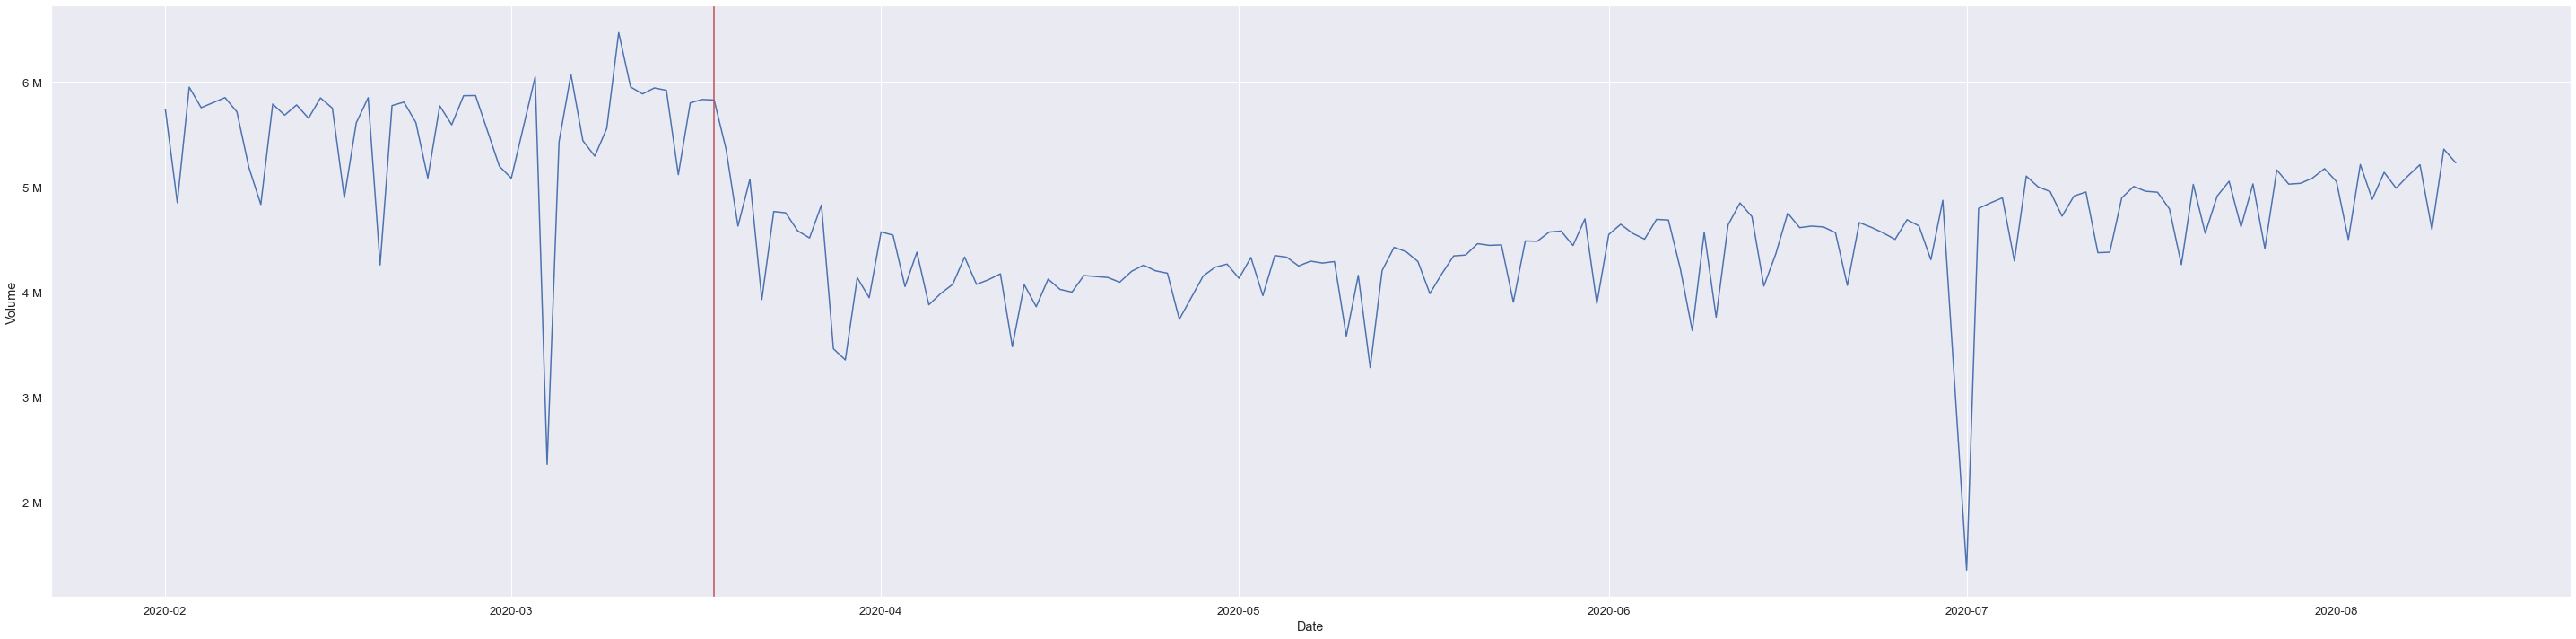

In [40]:
fig = plt.figure(figsize=(40,10))


ax = sns.lineplot(x='Date',y='Volume',data=df_temp,palette=['#000'])

# sns.barplot(x='Date',y='Volume',data=df_total_flux[df_total_flux.Date>='2020-06-29'],palette=['#5DADE2'])

ax.axvline('2020-03-18',ymin = 0, ymax = 1,color = 'r')

# ax.set_xticklabels(labels = df_temp_gombe['Date'], rotation=90)
# ax.

# ax.axvline('2020-06-10',ymin = 0, ymax = 1,color = 'r')
# ax.set_xticklabels(labels=,rotation=45)
# plt.xlim(0)
ax.yaxis.set_major_formatter(ticker.EngFormatter())
plt.tight_layout()
plt.show()

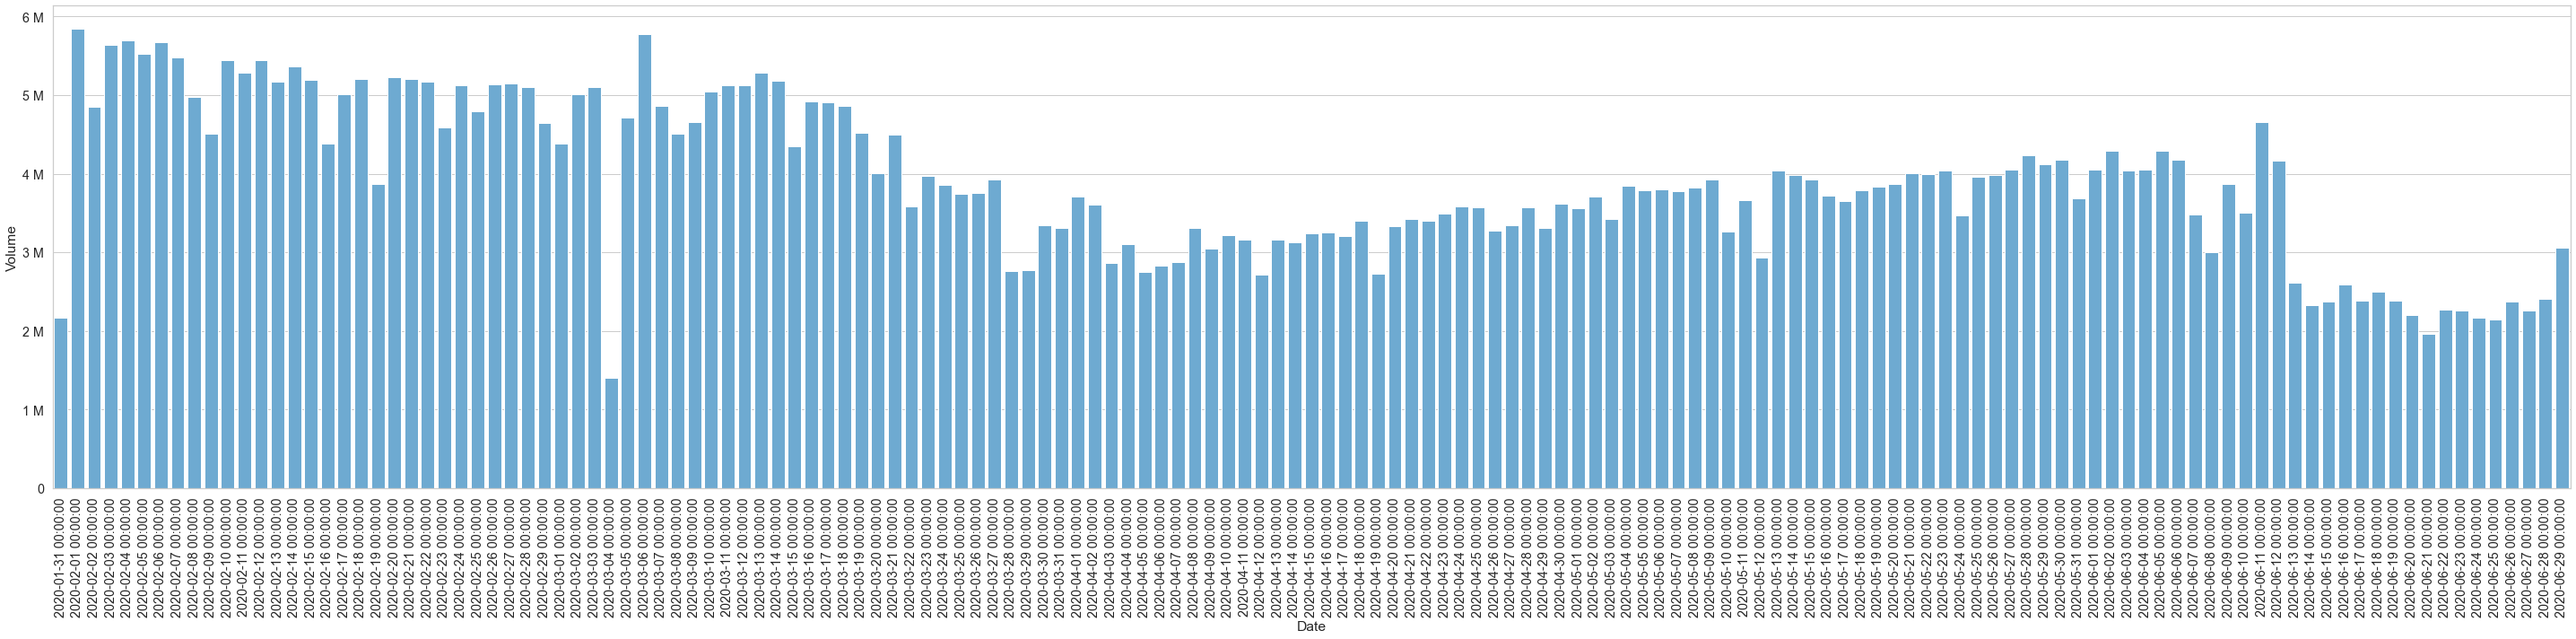

In [43]:
fig = plt.figure(figsize=(40,10))


ax = sns.barplot(x='Date',y='Volume',data=df_temp,palette=['#5DADE2'])

# sns.barplot(x='Date',y='Volume',data=df_total_flux[df_total_flux.Date>='2020-06-29'],palette=['#5DADE2'])

# ax.axvline('2020-03-18',ymin = 0, ymax = 1,color = 'r')
ax.set_xticklabels(labels = df_temp['Date'], rotation=90)
# ax.

# ax.axvline('2020-06-10',ymin = 0, ymax = 1,color = 'r')
# ax.set_xticklabels(labels=,rotation=45)
# plt.xlim(0)
ax.yaxis.set_major_formatter(ticker.EngFormatter())
plt.tight_layout()
plt.show()

### Net Mobility Variation( Overall)

In [41]:
df_agg_gen_mob = df_filtered_both.groupby(by=['Date','Date_day'],as_index=0).sum()

In [42]:
def filter_df_from_to(start_date, end_date, df):
    mask_base = (df['Date'] >= start_date) & (df['Date'] <= end_date)
    return df.loc[mask_base]

In [43]:
ref_start_date = '2020-02-18'
ref_end_date = '2020-03-18'

# mask_base = (df_agg_gen_mob['Date'] >= ref_start_date) & (df_agg_gen_mob['Date'] <= ref_end_date)

obs_start_date = '2020-03-19'
obs_end_date = '2020-12-29'

# mask_obs = (df_agg_gen_mob['Date'] >= obs_start_date) & (df_agg_gen_mob['Date'] <= obs_end_date)

df_ref_gen = filter_df_from_to(ref_start_date, ref_end_date,df_agg_gen_mob)#df_agg_gen_mob.loc[mask_base]
df_obs_gen = filter_df_from_to(obs_start_date, obs_end_date,df_agg_gen_mob)#df_agg_gen_mob.loc[mask_obs]

In [44]:
diff_mob_gen = df_obs_gen['Volume'].median() - df_ref_gen['Volume'].median()
delta_mob_gen = diff_mob_gen/df_ref_gen['Volume'].median()*100
diff_mob_gen,delta_mob_gen

(-1300198.5, -22.461454901736204)

### Net Mobility Variation By Zone

In [45]:
df_filtered_agg_in = df_filtered_both.groupby(by=['Date','Destination','Date_day'],as_index=0).sum()
#df_filtered_agg_in[(df_filtered_agg_in.Destination == 'Gombe') & (df_filtered_agg_in.Date == '2020-02-02')]

In [46]:
df_filtered_agg_out = df_filtered_both.groupby(by=['Date','Origin','Date_day'],as_index=0).sum()
#df_filtered_agg_out

In [47]:
df_filtered_agg_in_out = pd.merge(df_filtered_agg_in,df_filtered_agg_out, left_on=['Date','Destination','Date_day'], right_on=['Date','Origin','Date_day'])
df_filtered_agg_in_out

Date  Destination  Date_day  Volume_x       Origin  Volume_y
0    2020-02-01      Banalia         5        21      Banalia        21
1    2020-02-01      Barumbu         5    145736      Barumbu    146464
2    2020-02-01  Binza Meteo         5    395893  Binza Meteo    400767
3    2020-02-01  Binza Ozone         5    195177  Binza Ozone    193460
4    2020-02-01         Boko         5      2514         Boko     14060
...         ...          ...       ...       ...          ...       ...
8513 2020-08-11       Police         1     99466       Police     89873
8514 2020-08-11   Seke-Banza         1       134   Seke-Banza        52
8515 2020-08-11     Selembao         1    208019     Selembao    210338
8516 2020-08-11    Sona-Bata         1     18288    Sona-Bata     19461
8517 2020-08-11        Vanga         1        27        Vanga       332

[8518 rows x 6 columns]

In [48]:
#df_filtered_both.groupby(by=['Date'],as_index=0).sum()

In [49]:
#Sum volume inbound and outbound for each zone
df_filtered_agg_in_out['Volume_x_plus_y'] = df_filtered_agg_in_out['Volume_x'] + df_filtered_agg_in_out['Volume_y']

In [50]:
# mobility with baseline  (the starting date of lockdown in DRC)
ref_start_date = '2020-02-18'
ref_end_date = '2020-03-18'

# mask_base = (df_filtered_agg_in_out['Date'] >= ref_start_date) & (df_filtered_agg_in_out['Date'] <= ref_end_date)

obs_start_date = '2020-03-19'
obs_end_date = '2020-12-29'

# mask_obs = (df_filtered_agg_in_out['Date'] >= obs_start_date) & (df_filtered_agg_in_out['Date'] <= obs_end_date)

df_ref = filter_df_from_to(ref_start_date, ref_end_date,df_filtered_agg_in_out)#df_agg_gen_mob.loc[mask_base]
df_obs = filter_df_from_to(obs_start_date, obs_end_date,df_filtered_agg_in_out)#df_agg_gen_mob.loc[mask_obs]

In [51]:
df_ref_agg = df_ref.groupby(by=['Date','Destination','Date_day'],as_index=0).sum().groupby(by=['Destination'],as_index=0).median()
df_obs_agg = df_obs.groupby(by=['Date','Destination','Date_day'],as_index=0).sum().groupby(by=['Destination'],as_index=0).median()

In [52]:
df_ref_agg

Destination  Date_day  Volume_x  Volume_y  Volume_x_plus_y
0       Barumbu       3.0  153123.0  151410.5         304800.5
1          Beni       3.0     811.0     285.0           1096.0
2   Binza Meteo       3.0  397777.5  394297.0         795850.5
3   Binza Ozone       3.0  190704.0  189513.5         381421.5
4          Boko       3.0     804.0    7921.0           9774.5
..          ...       ...       ...       ...              ...
73      Tandala       5.0     210.0    1819.5           2029.5
74  Tshamilemba       3.0      44.5     116.0            175.0
75     Tshikapa       3.0     379.5     735.0           1114.5
76        Vanga       3.0     626.5    4823.5           5696.0
77      Wangata       4.0      50.0     580.0            612.0

[78 rows x 5 columns]

In [53]:
df_obs_agg

Destination  Date_day  Volume_x  Volume_y  Volume_x_plus_y
0       Barumbu       3.0  114917.0  116269.0         231287.0
1        Bikoro       2.0      30.0     635.0            667.0
2   Binza Meteo       3.0  325234.0  324593.0         651263.0
3   Binza Ozone       3.0  146715.0  149572.0         294944.0
4        Boende       3.0     126.0   10182.0          10308.0
..          ...       ...       ...       ...              ...
89         Vaku       5.0      78.0      25.0            103.0
90        Vanga       3.0      73.5    2382.0           2653.0
91      Wangata       4.5      32.0     483.0            513.5
92      Yambuku       6.0      28.0      28.0             56.0
93        Zongo       2.0      45.0      45.0             90.0

[94 rows x 5 columns]

In [54]:
df_obs_agg_merge = pd.merge(df_ref_agg, df_obs_agg,left_on='Destination', right_on='Destination')
df_obs_agg_merge['diffVolume_x_plus_y_x_y'] = df_obs_agg_merge['Volume_x_plus_y_y'] - df_obs_agg_merge['Volume_x_plus_y_x']

df_obs_agg_merge['mobility variation'] = df_obs_agg_merge['diffVolume_x_plus_y_x_y']/df_obs_agg_merge['Volume_x_plus_y_x']*100
df_obs_agg_merge = df_obs_agg_merge.sort_values('mobility variation')
df_obs_agg_merge = df_obs_agg_merge[df_obs_agg_merge.Destination.isin(list_filtered_zones)]

In [55]:
df_obs_agg_merge

Destination  Date_day_x  Volume_x_x  Volume_y_x  Volume_x_plus_y_x  \
14            Gombe         3.0    437541.5    476882.5           910189.5   
44         Maluku I         3.0     47021.5     49429.0            95230.0   
61           Police         3.0    114138.5    107337.5           220939.0   
29         Kinshasa         3.0    182091.0    178551.0           361045.5   
21        Kasa-Vubu         3.0    184019.5    181553.5           365106.0   
36           Limete         3.0    294144.0    291564.5           587587.5   
0           Barumbu         3.0    153123.0    151410.5           304800.5   
35            Lemba         3.0    291038.0    284855.0           575661.0   
2       Binza Ozone         3.0    190704.0    189513.5           381421.5   
59            Nsele         3.0    290801.0    291235.0           578635.0   
18        Kalamu II         3.0    176616.0    169539.0           345647.5   
33           Kokolo         3.0    194785.0    186849.0           383802.5   
30         Kintambo         3.0    101318.0     99952.5           200985.5   
57      Ngiri-Ngiri         3.0    190455.0    185908.0           375050.5   
1       Binza Meteo         3.0    397777.5    394297.0           795850.5   
47        Masina II         3.0    206044.0    205664.0           409908.5   
17         Kalamu I         3.0    171901.0    169491.5           342130.0   
49           Matete         3.0    153726.5    151202.5           307086.0   
56           Ndjili         3.0    242006.5    238450.5           482095.5   
46         Masina I         3.0     96437.0     95463.5           192426.0   
23           Kikimi         3.0    123371.5    121147.5           243230.5   
32          Kisenso         3.0    155081.0    154193.5           310959.0   
10            Bumbu         3.0    195553.0    195058.0           391045.0   
42           Makala         3.0    125306.0    124442.0           249514.0   
54  Mont Ngafula II         3.0    175089.5    174118.5           350234.0   
28         Kingabwa         3.0    150721.0    148416.0           299267.5   
25       Kimbanseke         3.0    282035.5    277019.0           556176.5   
53   Mont Ngafula I         3.0    191214.5    190069.0           381481.5   
63         Selembao         3.0    220969.0    219784.0           440091.0   

    Date_day_y  Volume_x_y  Volume_y_y  Volume_x_plus_y_y  \
14         3.0    127929.0    135355.0           263001.0   
44         3.0     31562.0     32195.0            63227.0   
61         3.0     74767.0     72284.0           147436.0   
29         3.0    130174.0    130515.0           260225.0   
21         3.0    136929.0    134133.0           271072.0   
36         3.0    220895.0    224194.0           443190.0   
0          3.0    114917.0    116269.0           231287.0   
35         3.0    222044.0    219613.0           441062.0   
2          3.0    146715.0    149572.0           294944.0   
59         3.0    227046.0    224150.0           450920.0   
18         3.0    137807.0    132394.0           271127.0   
33         3.0    155604.0    150738.0           306776.0   
30         3.0     81968.0     81354.0           162845.0   
57         3.0    155296.0    150637.0           306632.0   
1          3.0    325234.0    324593.0           651263.0   
47         3.0    166640.0    167601.0           336762.0   
17         3.0    140841.0    139642.0           281118.0   
49         3.0    129582.0    128116.0           256936.0   
56         3.0    201880.0    200573.0           403459.0   
46         3.0     81819.0     79984.0           161899.0   
23         3.0    105965.0    103774.0           209226.0   
32         3.0    133996.0    133595.0           267796.0   
10         3.0    168801.0    168590.0           337636.0   
42         3.0    108322.0    109583.0           217470.0   
54         3.0    151802.0    154965.0           305383.0   
28         3.0    130203.0    132012.0           261650.0   
25         3.0    24

In [56]:
df_obs_agg_merge[['Destination','mobility variation']].to_clipboard(True)

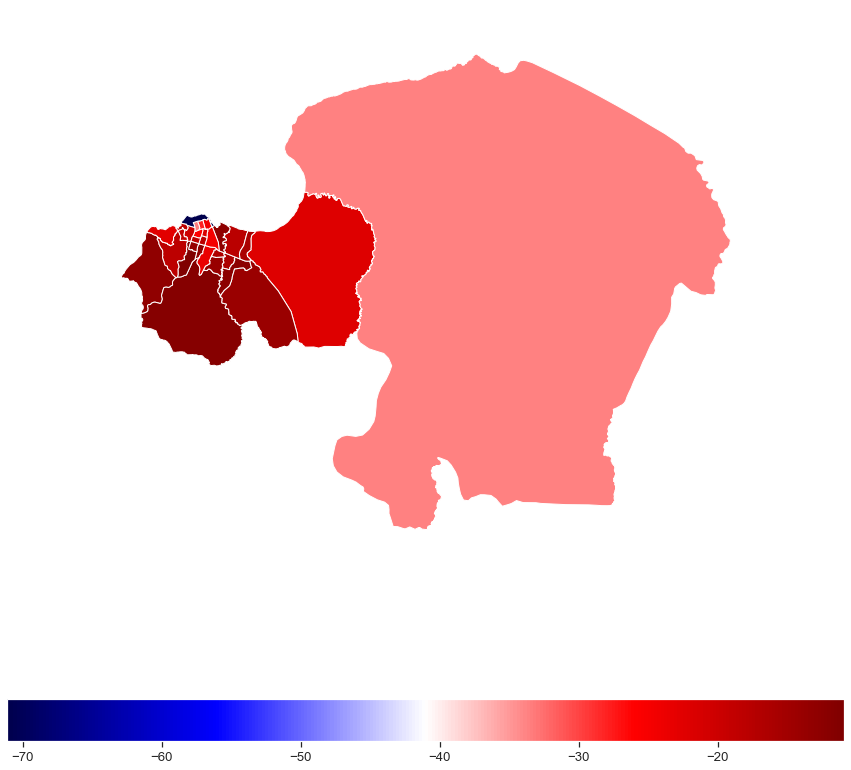

In [57]:
merged_agg = zone_filtered_gd.merge(df_obs_agg_merge[['Destination','mobility variation']],left_on = 'Zone+Peupl', right_on = 'Destination' )
# merged_agg = merged_agg.rename(columns={'mobility variation':'mobility variation'})
gpl.choropleth(
    merged_agg, hue=merged_agg['mobility variation'],
    cmap='seismic', figsize=(15, 15),
    legend=True
    , legend_kwargs={'orientation': 'horizontal'}
)
plt.show()

In [58]:
# merged_agg.to_file("mobgen.geojson", driver='GeoJSON')



In [59]:
#data_geojson =  geojson.loads('https://raw.githubusercontent.com/mapbox/mapboxgl-jupyter/master/examples/data/us-states.geojson')

In [60]:
# merged_agg

In [62]:
# # Load data from sample csv
# data_url = 'https://raw.githubusercontent.com/mapbox/mapboxgl-jupyter/master/examples/data/points.csv'
# df = pd.read_csv(data_url).round(3)

# # Create a geojson Feature Collection from the current dataframe
# geodata = df_to_geojson(df, 
#                         properties=['Avg Medicare Payments', 'Avg Covered Charges', 'date'], 
#                         lat='lat', 
#                         lon='lon', 
#                         precision=3)

# # Generate data breaks using numpy quantiles and color stops from colorBrewer
# measure = 'Avg Medicare Payments'
# color_breaks = [round(df[measure].quantile(q=x*0.1), 2) for x in range(1,9)]
# color_stops = create_color_stops(color_breaks, colors='YlOrRd')

# # Create the viz from the dataframe
# viz = CircleViz(geodata, 
#                 access_token=token, 
#                 color_property='Avg Medicare Payments',
#                 color_stops=color_stops,
#                 radius=2.5,
#                 stroke_width=0.2,
#                 center=(-95, 40),
#                 zoom=2.5,
#                 below_layer='waterway-label',
#                 height='300px')

# # Show the viz
# viz.show()

In [248]:
# viz.legend_layout = 'vertical'
# viz.legend_gradient = False
# viz.legend_fill = '#f0f0ef'
# viz.legend_text_color = '#000000'
# viz.legend_header_fill = '#819092'
# viz.legend_key_borders_on = False
# viz.legend_title_halo_color = '#777'
# viz.legend_key_shape = 'rounded-square'
# viz.show()

In [63]:
# viz.legend_gradient = True
# viz.show()

In [64]:
# viz.legend = True
# viz.legend_layout = 'horizontal'
# viz.legend_key_borders_on = True
# viz.legend_key_shape = 'contiguous-bar'
# viz.legend_text_numeric_precision = 0
# viz.legend_key_borders_on = False
# viz.show()

In [65]:
#from IPython.display import IFrame
# Must be a public token, starting with `pk`
token = 'pk.eyJ1IjoiZGplZmZrYW5kYSIsImEiOiJja2VlMDR1aG0wZzdzMnlrZmhkMnRwMHgxIn0.uN2NmnZHgckSTzI28ZgCIg'

# Must be a public token, starting with `pk`
# token = os.getenv('MAPBOX_ACCESS_TOKEN')


# data_geojson = json.loads("./map.geojson")

# Create Choropleth with GeoJSON Source
viz = ChoroplethViz(json.loads(merged_agg.to_json()),
                    access_token=token,
                     color_property='mobility variation',
                     color_stops=create_color_stops([-80, -60, -50, -40, -30, -20], colors='OrRd'),
                     color_function_type='interpolate',
                     line_stroke='--',
                     line_color='rgb(128,0,38)',
                     line_width=1,
                     line_opacity=0.9,
                     opacity=0.6,
                    # center=(-96, 37.8),
                     zoom=3,
                     below_layer='waterway-label',
                    legend_layout = 'horizontal'
                    )

# IFrame(,100,100)
viz.legend = True
viz.legend_layout = 'horizontal'
viz.legend_key_borders_on = True
viz.legend_key_shape = 'contiguous-bar'
viz.legend_text_numeric_precision = 0
viz.legend_key_borders_on = False
viz.show()

/Users/djk/opt/anaconda3/envs/geo_env/lib/python3.8/site-packages/IPython/core/display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [67]:
# df_obs_agg_merge.head(5)[['Destination','deltaVolume_x_plus_y_x_y']].to_clipboard(True)
# df_obs_agg_merge.head(5)

In [69]:
# df_obs_agg_merge.tail(5)[['Destination','deltaVolume_x_plus_y_x_y']].to_clipboard(True)
# df_obs_agg_merge.tail(5)

In [5]:
fig = plt.figure(figsize=(8,14))
ax = sns.barplot(y="Destination", x="deltaVolume_x_plus_y_x_y", palette=['#5DADE2'],data = df_obs_agg_merge.head(6), orient = 'h')

ax.set(title = 'Mobilité',xlabel = "$\Delta$ Mobilité",ylabel = 'Zone')
ax.xaxis.set_major_formatter(ticker.EngFormatter())
plt.show()

NameError: name 'df_obs_agg_merge' is not defined

<Figure size 576x1008 with 0 Axes>

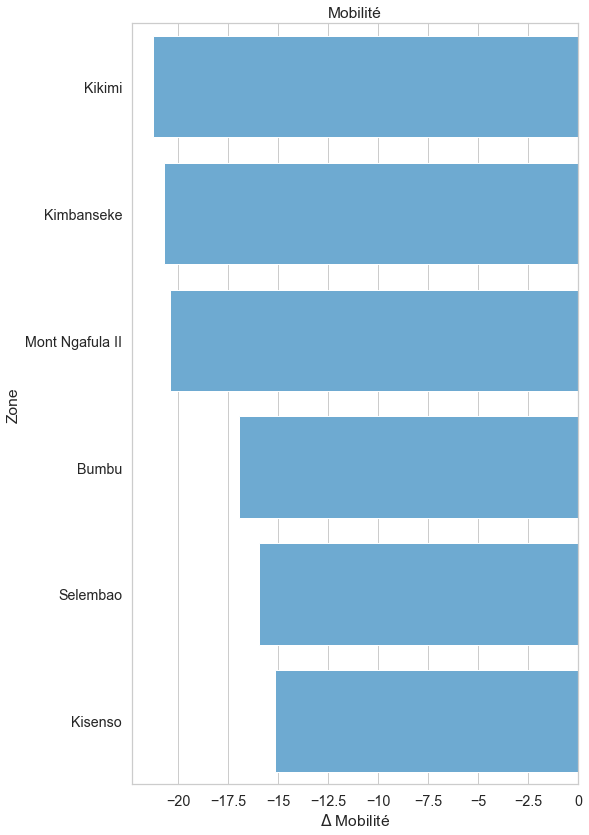

In [63]:
fig = plt.figure(figsize=(8,14))
ax = sns.barplot(y="Destination", x="deltaVolume_x_plus_y_x_y", palette=['#5DADE2'],data = df_obs_agg_merge.tail(6), orient = 'h')

ax.set(title = 'Mobilité',xlabel = "$\Delta$ Mobilité",ylabel = 'Zone')
ax.xaxis.set_major_formatter(ticker.EngFormatter())
plt.show()

### Most affected zones

In [196]:
df_obs_agg_merge[df_obs_agg_merge.Destination.isin(list_most_aff)]

Destination  Date_day_x  Volume_x_x  Volume_y_x  Volume_x_plus_y_x  \
16        Gombe         3.0    333134.0    434039.5           769380.0   
41       Limete         3.0    253235.0    262579.0           518263.5   
3   Binza Ozone         3.0    161118.5    158379.5           319360.0   
39        Lemba         3.0    260952.5    254993.5           518826.0   
37       Kokolo         3.0    165162.0    160617.0           326986.5   

    Date_day_y  Volume_x_y  Volume_y_y  Volume_x_plus_y_y  \
16         3.0     81829.0     94114.0           174317.0   
41         3.0    163200.0    168650.0           332216.0   
3          3.0    108438.0    111339.0           219718.0   
39         3.0    180043.0    179540.0           358344.0   
37         3.0    120666.0    120605.0           240145.0   

    diffVolume_x_plus_y_x_y  deltaVolume_x_plus_y_x_y  
16                -595063.0                -77.343185  
41                -186047.5                -35.898245  
3                  -99642.0                -31.200526  
39                -160482.0                -30.931757  
37                 -86841.5                -26.558130

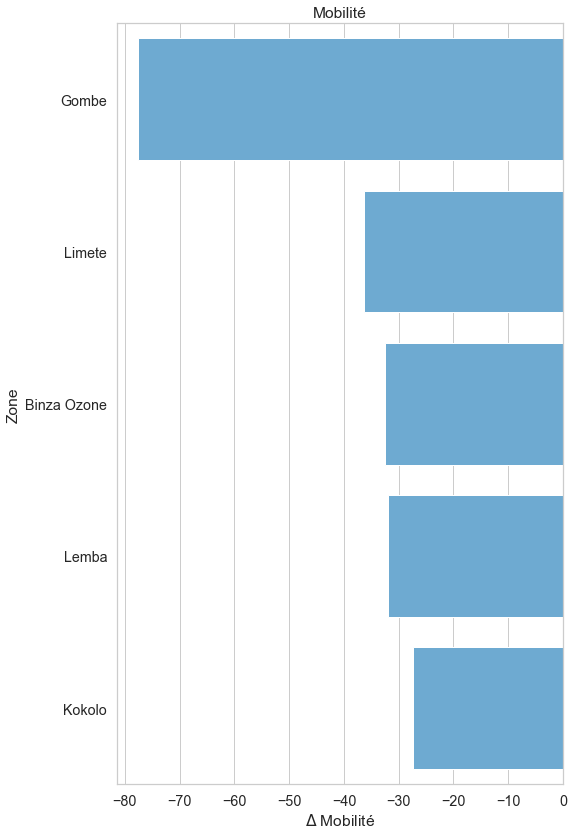

In [64]:
fig = plt.figure(figsize=(8,14))
list_most_aff = ['Gombe','Limete','Kokolo','Binza Ozone','Lemba']
ax = sns.barplot(y="Destination", x="deltaVolume_x_plus_y_x_y", palette=['#5DADE2'],data = df_obs_agg_merge[df_obs_agg_merge.Destination.isin(list_most_aff)], orient = 'h')

ax.set(title = 'Mobilité',xlabel = "$\Delta$ Mobilité",ylabel = 'Zone')
ax.xaxis.set_major_formatter(ticker.EngFormatter())
plt.show()

In [43]:
df_obs_agg_merge[df_obs_agg_merge.Destination.isin(list_most_aff)][['Destination','deltaVolume_x_plus_y_x_y']].to_clipboard(True)

## INBound and OUTBound

In [71]:
#Split Filtered DF to IN and OUT
df_filtered_out = df_g[(df_g['Origin'].isin(list_filtered_zones))]#.drop('Date_day',axis=1)
df_filtered_in = df_g[(df_g['Destination'].isin(list_filtered_zones))]#.drop('Date_day',axis=1)

In [72]:
df_filtered_out

Date    Origin   Destination Observation_Zone  Date_day  Volume
35     2020-02-01   Barumbu       Banalia      ZoneGlobale         5      21
36     2020-02-01   Barumbu   Binza Meteo      ZoneGlobale         5    4110
37     2020-02-01   Barumbu   Binza Ozone      ZoneGlobale         5    2591
38     2020-02-01   Barumbu   Boko-Kivulu      ZoneGlobale         5      22
39     2020-02-01   Barumbu         Bumbu      ZoneGlobale         5    1492
...           ...       ...           ...              ...       ...     ...
507038 2020-08-11  Selembao   Ngiri-Ngiri      ZoneGlobale         1    7055
507039 2020-08-11  Selembao         Nsele      ZoneGlobale         1    3934
507040 2020-08-11  Selembao  Nsona-Mpangu      ZoneGlobale         1     186
507041 2020-08-11  Selembao        Police      ZoneGlobale         1    1881
507042 2020-08-11  Selembao     Sona-Bata      ZoneGlobale         1    3540

[182043 rows x 6 columns]

In [73]:
df_filtered_in

Date     Origin      Destination Observation_Zone  Date_day  \
27     2020-02-01       Baka         Kintambo      ZoneGlobale         5   
28     2020-02-01    Banalia          Barumbu      ZoneGlobale         5   
36     2020-02-01    Barumbu      Binza Meteo      ZoneGlobale         5   
37     2020-02-01    Barumbu      Binza Ozone      ZoneGlobale         5   
39     2020-02-01    Barumbu            Bumbu      ZoneGlobale         5   
...           ...        ...              ...              ...       ...   
507083 2020-08-11  Sona-Bata         Selembao      ZoneGlobale         1   
507105 2020-08-11     Tshela  Mont Ngafula II      ZoneGlobale         1   
507175 2020-08-11      Vanga           Kikimi      ZoneGlobale         1   
507178 2020-08-11      Vanga         Maluku I      ZoneGlobale         1   
507179 2020-08-11      Vanga        Masina II      ZoneGlobale         1   

        Volume  
27         221  
28          21  
36        4110  
37        2591  
39        1492  
...        ...  
507083    3823  
507105      26  
507175     281  
507178      24  
507179      27  

[188461 rows x 6 columns]

# Mobility Visualization

## $\Delta$ Mobillity (IN) By Zone

### Daily Movement Flow by Zone de sante

In [76]:
df_temp = df_filtered_in.groupby(by=['Date','Destination'],as_index=0).sum()

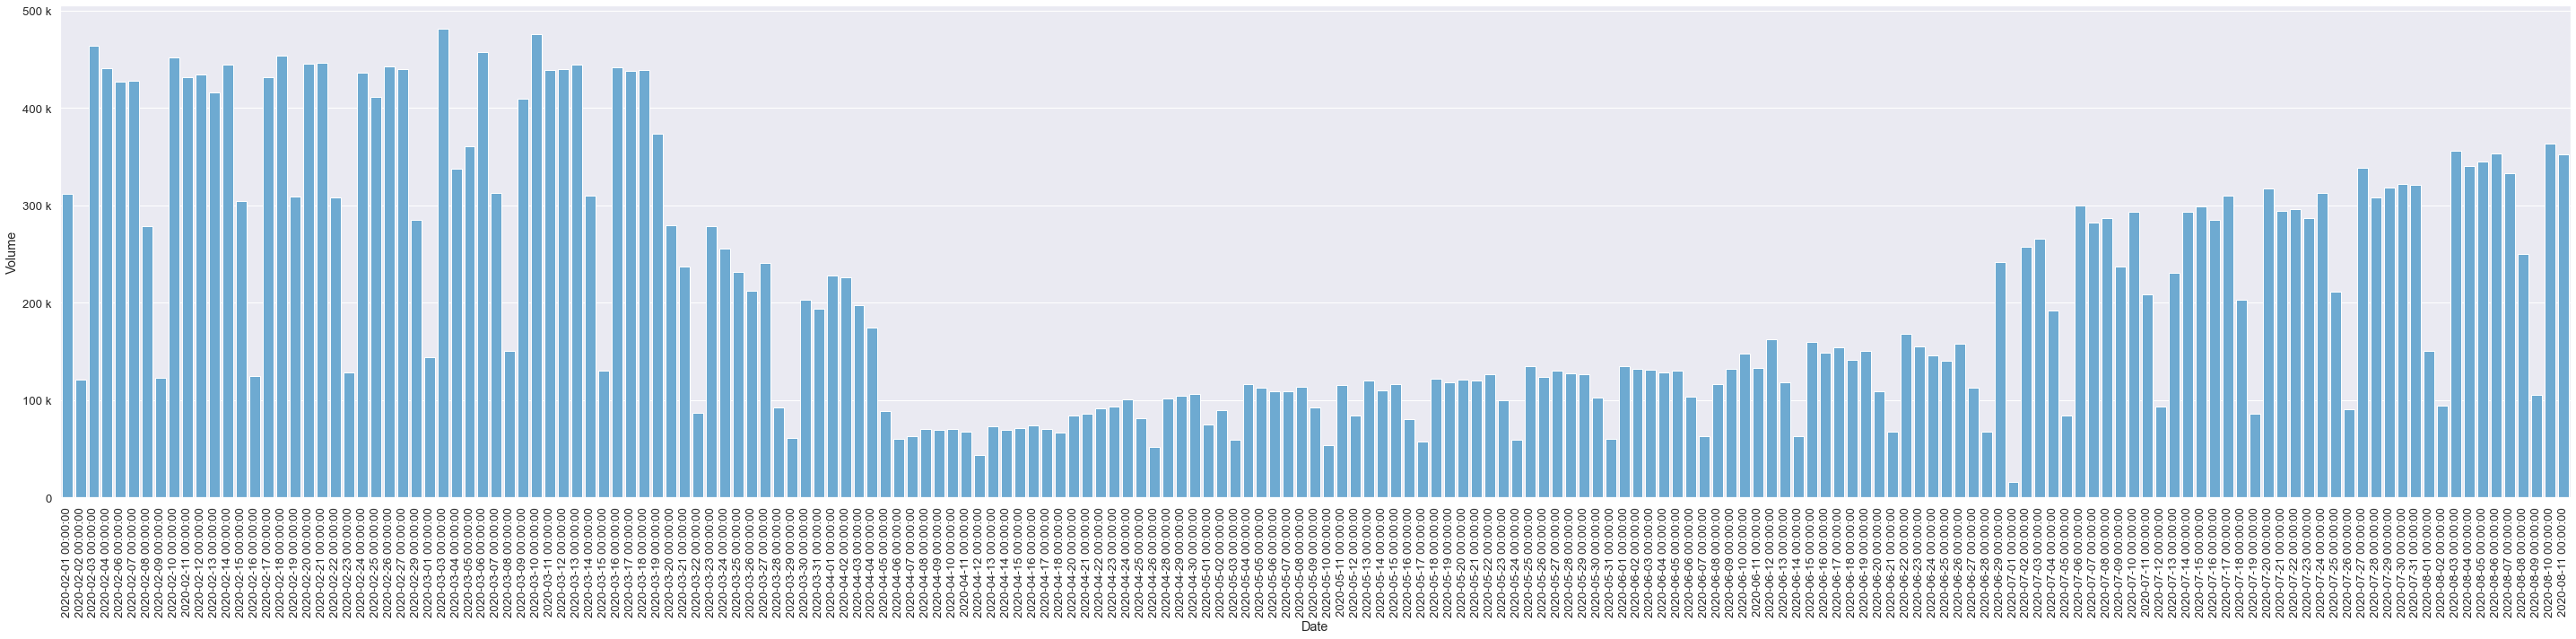

In [77]:
fig = plt.figure(figsize=(40,10))

df_temp_gombe = df_temp[df_temp.Destination == 'Gombe']

ax = sns.barplot(x='Date',y='Volume',data=df_temp_gombe,palette=['#5DADE2'])

# sns.barplot(x='Date',y='Volume',data=df_total_flux[df_total_flux.Date>='2020-06-29'],palette=['#5DADE2'])

# ax.axvline('2020-03-18',ymin = 0, ymax = 1,color = 'r')
ax.set_xticklabels(labels = df_temp_gombe['Date'], rotation=90)
# ax.

# ax.axvline('2020-06-10',ymin = 0, ymax = 1,color = 'r')
# ax.set_xticklabels(labels=,rotation=45)
# plt.xlim(0)
ax.yaxis.set_major_formatter(ticker.EngFormatter())
plt.tight_layout()
plt.show()

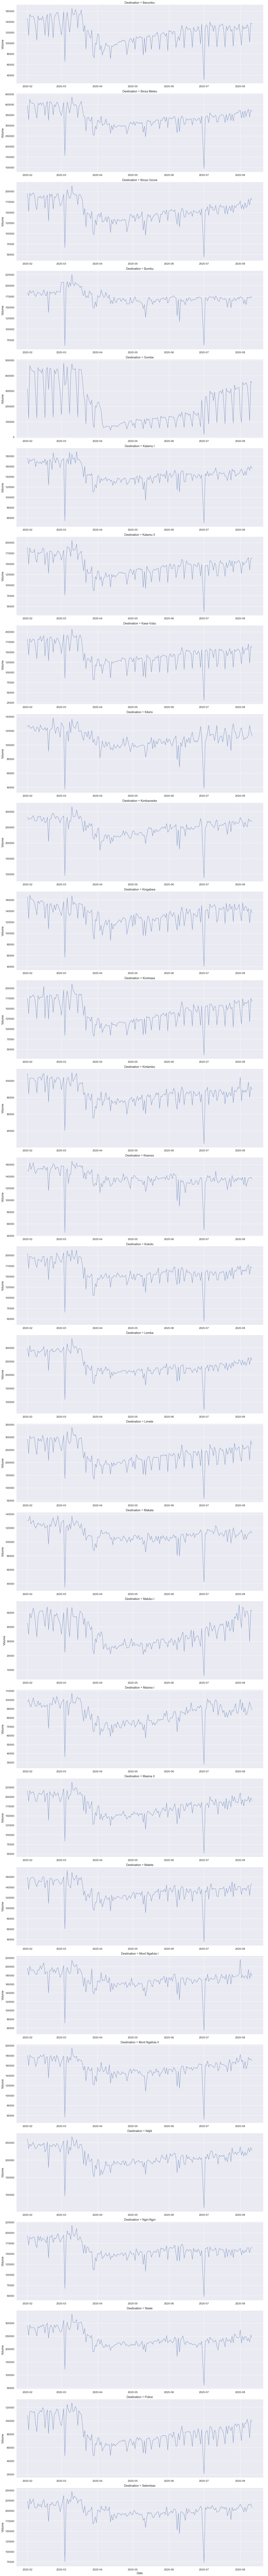

In [78]:
g = sns.FacetGrid(df_temp, row="Destination",aspect=3,height=6,sharey=False,sharex=False)
g.map(plt.plot, "Date", "Volume", alpha=.7)
g.add_legend();

#### Daily Movement to Gombe

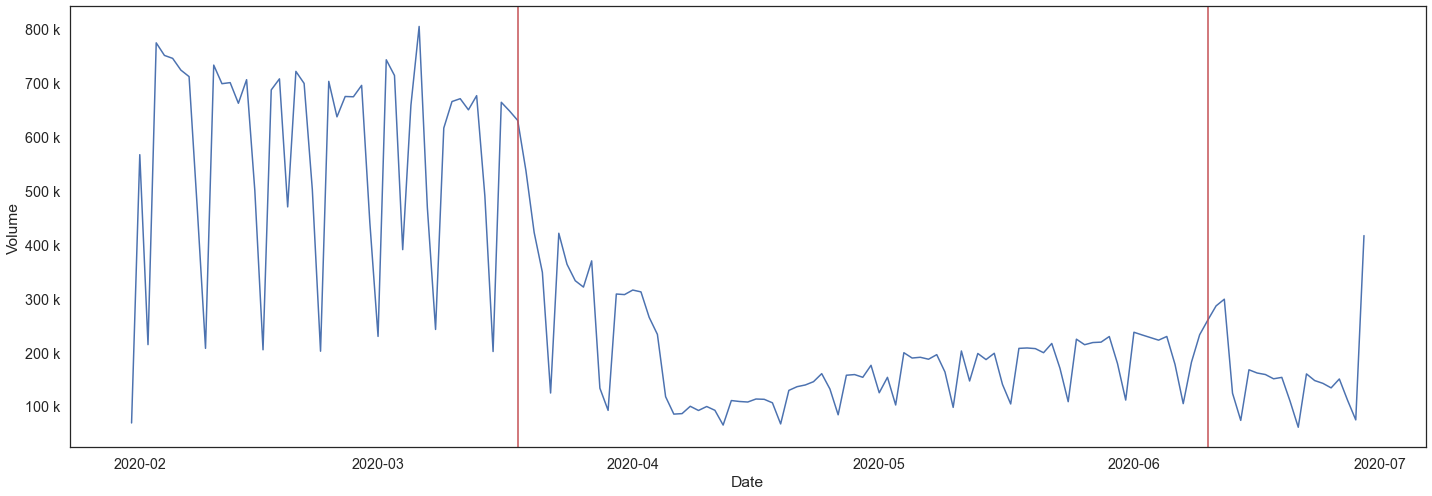

In [464]:
fig = plt.figure(figsize=(20,7))
ax = sns.lineplot(x='Date',y='Volume',data=df_temp[df_temp.Destination == 'Gombe' ])

# ax.set_xticklabels(labels = df_total_flux['Date'], rotation=90)
# ax.
ax.axvline('2020-03-18',ymin = 0, ymax = 1,color = 'r')

ax.axvline('2020-06-10',ymin = 0, ymax = 1,color = 'r')
ax.yaxis.set_major_formatter(ticker.EngFormatter())
# ax.set_xticklabels(labels=,rotation=45)
# plt.xlim(0)
plt.tight_layout()
plt.show()

In [80]:
# mobility with baseline  (the starting date of lockdown in DRC)
ref_start_date = '2020-02-01'
ref_end_date = '2020-03-18'

mask_base = (df_filtered_in['Date'] >= ref_start_date) & (df_filtered_in['Date'] <= ref_end_date)

obs_start_date = '2020-03-19'
obs_end_date = '2020-12-29'

mask_obs = (df_filtered_in['Date'] >= obs_start_date) & (df_filtered_in['Date'] <= obs_end_date)

df_ref = df_filtered_in.loc[mask_base]
df_obs = df_filtered_in.loc[mask_obs]

## Reference period

In [81]:
df_ref_agg = df_ref.groupby(by=['Date','Destination','Date_day'],as_index=0).sum()
df_ref_agg[df_ref_agg.Destination == 'Gombe']

Date Destination  Date_day  Volume
4    2020-02-01       Gombe         5  312379
33   2020-02-02       Gombe         6  120767
62   2020-02-03       Gombe         0  464154
91   2020-02-04       Gombe         1  441302
120  2020-02-06       Gombe         3  426790
149  2020-02-07       Gombe         4  427710
178  2020-02-08       Gombe         5  278702
207  2020-02-09       Gombe         6  122539
236  2020-02-10       Gombe         0  452254
265  2020-02-11       Gombe         1  431528
294  2020-02-12       Gombe         2  434737
323  2020-02-13       Gombe         3  416085
352  2020-02-14       Gombe         4  444397
381  2020-02-15       Gombe         5  304254
410  2020-02-16       Gombe         6  124607
439  2020-02-17       Gombe         0  431880
468  2020-02-18       Gombe         1  453523
497  2020-02-19       Gombe         2  309563
526  2020-02-20       Gombe         3  445183
555  2020-02-21       Gombe         4  446835
584  2020-02-22       Gombe         5  308613
613  2020-02-23       Gombe         6  128659
642  2020-02-24       Gombe         0  436824
671  2020-02-25       Gombe         1  411890
700  2020-02-26       Gombe         2  442560
729  2020-02-27       Gombe         3  440312
758  2020-02-29       Gombe         5  285241
787  2020-03-01       Gombe         6  144290
816  2020-03-03       Gombe         1  481103
845  2020-03-04       Gombe         2  337679
874  2020-03-05       Gombe         3  360626
903  2020-03-06       Gombe         4  457911
932  2020-03-07       Gombe         5  312518
961  2020-03-08       Gombe         6  150969
990  2020-03-09       Gombe         0  409412
1019 2020-03-10       Gombe         1  476170
1048 2020-03-11       Gombe         2  439227
1077 2020-03-12       Gombe         3  440356
1106 2020-03-13       Gombe         4  445046
1135 2020-03-14       Gombe         5  309756
1164 2020-03-15       Gombe         6  130742
1193 2020-03-16       Gombe         0  441492
1222 2020-03-17       Gombe         1  438259
1251 2020-03-18       Gombe         2  439086

In [82]:
df_ref_agg = df_ref.groupby(by=['Date','Destination'],as_index=0).sum()
df_ref_agg = df_ref_agg.groupby(by='Destination',as_index=0).median().sort_values(by='Volume',ascending=0)
# df_ref_agg.to_clipboard()
df_ref_agg.drop('Date_day',inplace=True,axis = 1)
df_ref_agg

Destination    Volume
4             Gombe  429619.0
1       Binza Meteo  399229.0
16           Limete  292732.0
15            Lemba  288506.5
26            Nsele  287253.0
9        Kimbanseke  279007.0
24           Ndjili  242003.0
28         Selembao  217296.0
20        Masina II  206279.5
14           Kokolo  192999.5
22   Mont Ngafula I  191758.5
2       Binza Ozone  188055.5
25      Ngiri-Ngiri  187955.5
3             Bumbu  185533.5
7         Kasa-Vubu  181999.0
11         Kinshasa  177389.0
6         Kalamu II  176546.0
23  Mont Ngafula II  175520.0
5          Kalamu I  170271.0
21           Matete  153676.0
13          Kisenso  153258.5
10         Kingabwa  151796.0
0           Barumbu  147011.5
17           Makala  125327.0
8            Kikimi  123493.0
27           Police  112991.5
12         Kintambo  101860.5
19         Masina I   96251.5
18         Maluku I   47021.5

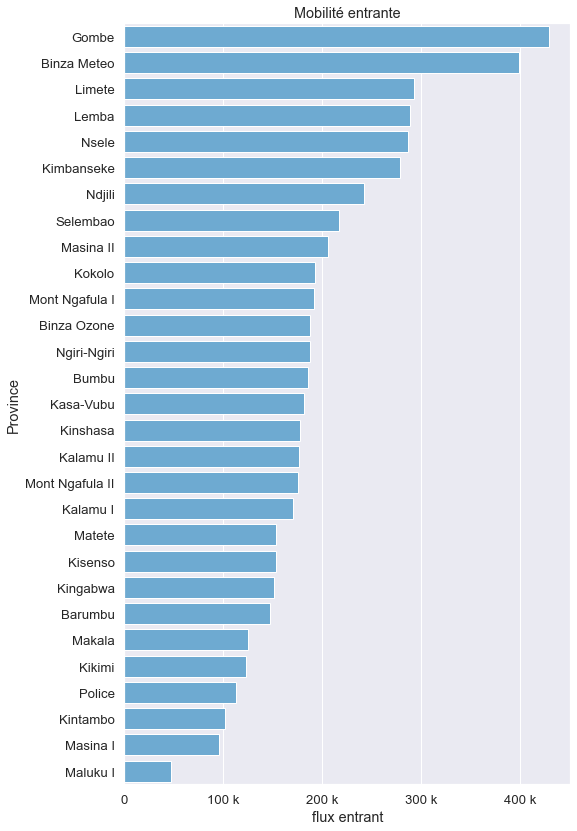

In [83]:
fig = plt.figure(figsize=(8,14))
ax = sns.barplot(y="Destination", x="Volume", palette=['#5DADE2'],data=df_ref_agg.sort_values(by = 'Volume',ascending=0), orient = 'h')
ax.set(title = 'Mobilité entrante',xlabel = "flux entrant",ylabel = 'Province')
ax.xaxis.set_major_formatter(ticker.EngFormatter())
plt.show()

## Observation period

In [84]:
df_obs_agg = df_obs.groupby(by=['Date','Destination'],as_index=0).sum()

df_obs_agg = df_obs_agg.groupby(by='Destination',as_index=0).median().sort_values(by='Volume',ascending=0)
# df_ref_agg.to_clipboard()
df_obs_agg.drop('Date_day',inplace=True,axis = 1)
df_obs_agg

Destination  Volume
1       Binza Meteo  325234
9        Kimbanseke  245701
26            Nsele  227046
15            Lemba  222044
16           Limete  220895
24           Ndjili  201880
28         Selembao  197368
3             Bumbu  168801
22   Mont Ngafula I  168400
20        Masina II  166640
14           Kokolo  155604
25      Ngiri-Ngiri  155296
23  Mont Ngafula II  151802
2       Binza Ozone  146715
5          Kalamu I  140841
6         Kalamu II  137807
7         Kasa-Vubu  136929
13          Kisenso  133996
10         Kingabwa  130203
11         Kinshasa  130174
21           Matete  129582
4             Gombe  127929
0           Barumbu  114917
17           Makala  108322
8            Kikimi  105965
12         Kintambo   81968
19         Masina I   81819
27           Police   74767
18         Maluku I   31562

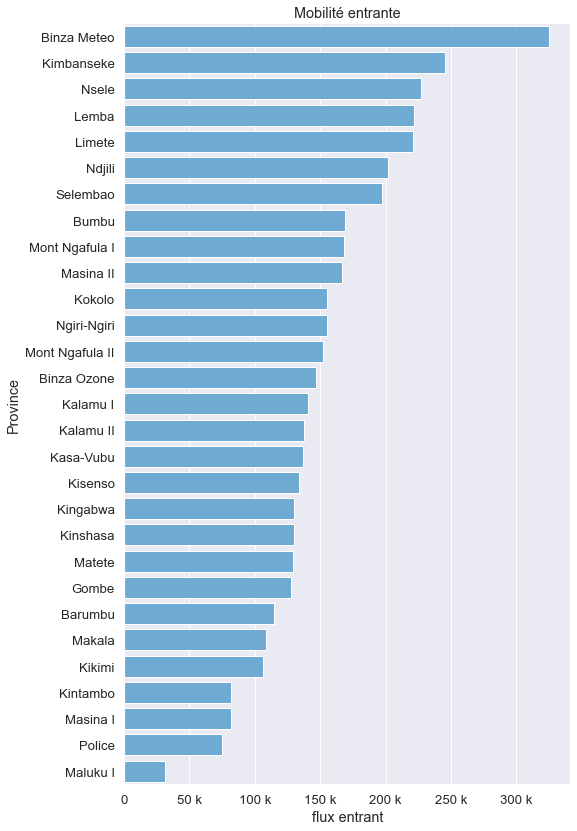

In [85]:
fig = plt.figure(figsize=(8,14))
ax = sns.barplot(y="Destination", x="Volume", palette=['#5DADE2'],data=df_obs_agg.sort_values(by = 'Volume',ascending=0), orient = 'h')
ax.set(title = 'Mobilité entrante',xlabel = "flux entrant",ylabel = 'Province')
ax.xaxis.set_major_formatter(ticker.EngFormatter())
plt.show()

In [86]:
zone_gd

Index        C0        C1   Surface     PROVINCE Zone+Peupl  \
0      231  0.357866  0.014489  33881.01   Sud-Ubangi    Tandala   
1      230  0.386971  0.023376    762.28   Sud-Ubangi      Zongo   
2      363  0.482317  0.117910  12679.67  Nord-Ubangi       Bili   
3      233  0.624055  0.264078   1251.62  Nord-Ubangi  Gbadolite   
4      159  0.329985  0.008398  21860.94  Nord-Ubangi       Loko   
..     ...       ...       ...       ...          ...        ...   
310    336  0.360842  0.124134   5558.60        Ituri        Aru   
311    340  0.647995  0.181076   1153.12        Ituri        Adi   
312    338  0.715352  0.264651   3159.19        Ituri    Ariwara   
313    335  0.471356  0.116512  12960.34    Haut-Uele        Aba   
314    346  0.492376  0.096703  19432.93    Haut-Uele      Dungu   

                                              geometry  
0    POLYGON ((18.68941 1.90628, 18.68649 1.90233, ...  
1    POLYGON ((18.67816 3.97665, 18.66909 3.96872, ...  
2    POLYGON ((19.42578 3.89935, 19.41802 3.89628, ...  
3    POLYGON ((20.86461 4.06245, 20.86071 4.06242, ...  
4    POLYGON ((21.35464 3.39852, 21.35367 3.39739, ...  
..                                                 ...  
310  POLYGON ((30.65123 2.14049, 30.65002 2.13740, ...  
311  POLYGON ((30.78577 3.29087, 30.77890 3.29006, ...  
312  POLYGON ((30.45461 2.91338, 30.43551 2.91118, ...  
313  POLYGON ((30.20675 2.59240, 30.18471 2.58432, ...  
314  POLYGON ((28.56956 2.81148, 28.56590 2.80066, ...  

[315 rows x 7 columns]

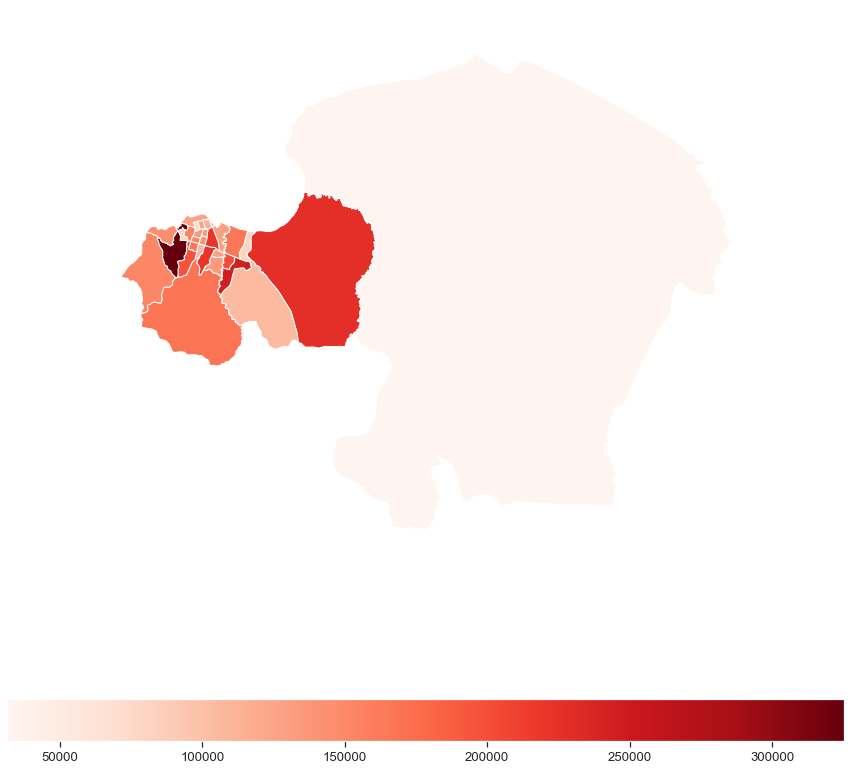

In [87]:
merged_df_agg = zone_filtered_gd.merge(df_obs_agg,left_on = 'Zone+Peupl', right_on = 'Destination' )
gpl.choropleth(
    merged_df_agg, hue=merged_df_agg['Volume'],
    cmap='Reds', figsize=(15, 15),
    legend=True
    , legend_kwargs={'orientation': 'horizontal'}
)
plt.show()

## Comparison

In [88]:
df_merged_agg = pd.merge(df_ref_agg,df_obs_agg,left_on='Destination',right_on='Destination')

df_merged_agg['diffVolume'] = (df_merged_agg.Volume_y - df_merged_agg.Volume_x )

df_merged_agg['deltaVolume'] = df_merged_agg['diffVolume']/df_merged_agg.Volume_x*100
df_merged_agg = df_merged_agg.sort_values(by='deltaVolume')
df_merged_agg

Destination  Volume_x  Volume_y  diffVolume  deltaVolume
0             Gombe  429619.0    127929   -301690.0   -70.222686
25           Police  112991.5     74767    -38224.5   -33.829536
28         Maluku I   47021.5     31562    -15459.5   -32.877513
15         Kinshasa  177389.0    130174    -47215.0   -26.616645
14        Kasa-Vubu  181999.0    136929    -45070.0   -24.763872
2            Limete  292732.0    220895    -71837.0   -24.540194
3             Lemba  288506.5    222044    -66462.5   -23.036743
11      Binza Ozone  188055.5    146715    -41340.5   -21.983138
16        Kalamu II  176546.0    137807    -38739.0   -21.942723
22          Barumbu  147011.5    114917    -32094.5   -21.831285
4             Nsele  287253.0    227046    -60207.0   -20.959572
26         Kintambo  101860.5     81968    -19892.5   -19.529160
9            Kokolo  192999.5    155604    -37395.5   -19.375957
8         Masina II  206279.5    166640    -39639.5   -19.216403
1       Binza Meteo  399229.0    325234    -73995.0   -18.534475
12      Ngiri-Ngiri  187955.5    155296    -32659.5   -17.376187
18         Kalamu I  170271.0    140841    -29430.0   -17.284212
6            Ndjili  242003.0    201880    -40123.0   -16.579547
19           Matete  153676.0    129582    -24094.0   -15.678440
27         Masina I   96251.5     81819    -14432.5   -14.994572
21         Kingabwa  151796.0    130203    -21593.0   -14.225013
24           Kikimi  123493.0    105965    -17528.0   -14.193517
23           Makala  125327.0    108322    -17005.0   -13.568505
17  Mont Ngafula II  175520.0    151802    -23718.0   -13.512990
20          Kisenso  153258.5    133996    -19262.5   -12.568634
10   Mont Ngafula I  191758.5    168400    -23358.5   -12.181207
5        Kimbanseke  279007.0    245701    -33306.0   -11.937335
7          Selembao  217296.0    197368    -19928.0    -9.170901
13            Bumbu  185533.5    168801    -16732.5    -9.018587

In [89]:
# dict_mob = {}
# for dest in list((df.groupby(by = 'Destination').groups.keys())):
#     baseline_value = df_ref['Volume'].loc[df_ref['Destination'] == dest ].sum() 
#      #avoid division by zero
#     if(baseline_value == 0):
#         continue
#     current_value = df_obs['Volume'].loc[df_obs['Destination'] == dest ].sum() 
#     dict_mob[dest] = (current_value - baseline_value)*100/baseline_value
# dict_mob
# df_mobility = pd.DataFrame(dict(provinces = list(dict_mob.keys()),Volume = list(dict_mob.values())))
# df_mobility

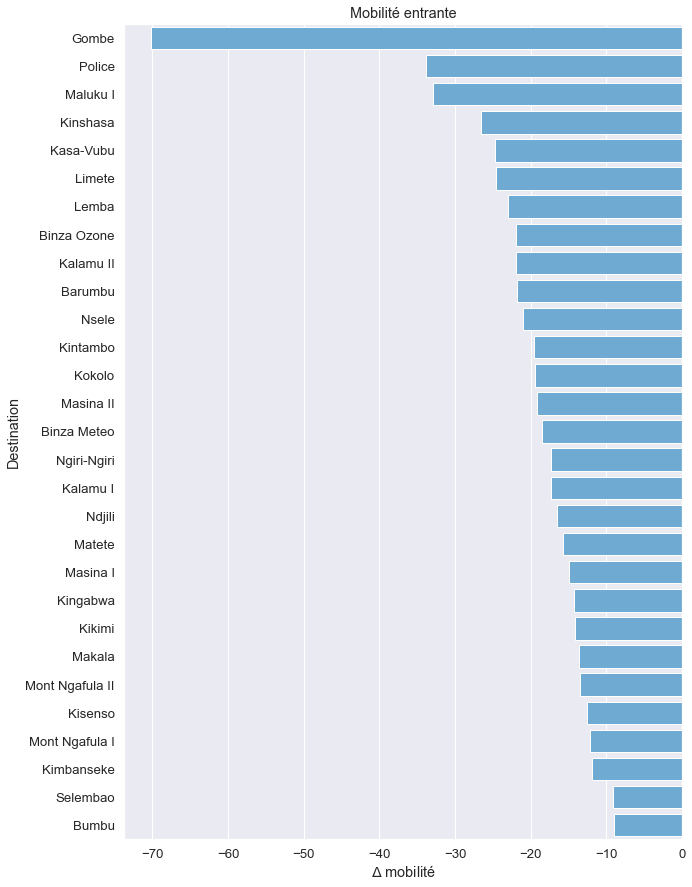

In [90]:
fig = plt.figure(figsize=(10,15))
ax = sns.barplot(y="Destination", x="deltaVolume",palette=['#5DADE2'], data=df_merged_agg.sort_values('deltaVolume'), orient = 'h')
ax.set(title = 'Mobilité entrante',xlabel = '$\Delta$ mobilité')
plt.show()

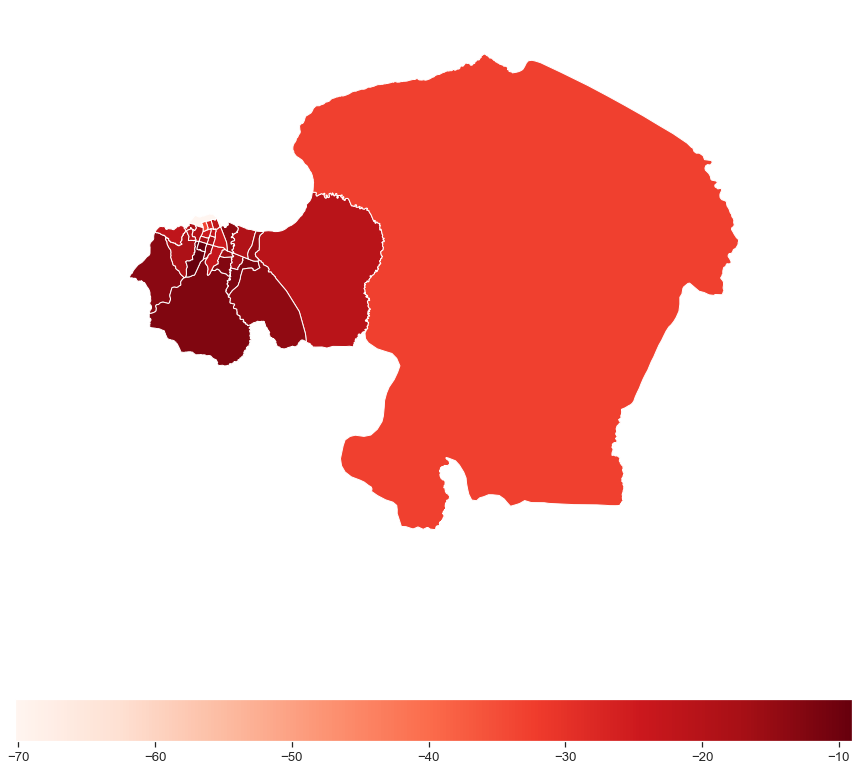

In [91]:
merged_agg = zone_filtered_gd.merge(df_merged_agg,left_on = 'Zone+Peupl', right_on = 'Destination' )
gpl.choropleth(
    merged_agg, hue=merged_agg['deltaVolume'],
    cmap='Reds', figsize=(15, 15),
    legend=True
    , legend_kwargs={'orientation': 'horizontal'}
)
plt.show()

### Mobillity (IN) trends By ZOne de sante

In [92]:
df_ref_agg_date_day = df_ref.groupby(by=['Date','Destination','Date_day'],as_index=0).sum().groupby(by=['Destination','Date_day'],as_index=0).median()
df_ref_agg_date_day[df_ref_agg_date_day.Destination == 'Gombe']

Destination  Date_day    Volume
28       Gombe         0  439158.0
29       Gombe         1  441302.0
30       Gombe         2  436911.5
31       Gombe         3  433551.0
32       Gombe         4  445046.0
33       Gombe         5  308613.0
34       Gombe         6  128659.0

In [93]:
df_obs_agg_date_dest_dd = df_obs.groupby(by=['Date','Destination','Date_day'],as_index=0).sum().sort_values('Date')
df_obs_agg_date_dest_dd[df_obs_agg_date_dest_dd.Destination == 'Gombe']

Date Destination  Date_day  Volume
4    2020-03-19       Gombe         3  373542
33   2020-03-20       Gombe         4  279306
62   2020-03-21       Gombe         5  237479
91   2020-03-22       Gombe         6   86893
120  2020-03-23       Gombe         0  278549
...         ...         ...       ...     ...
4006 2020-08-07       Gombe         4  333574
4035 2020-08-08       Gombe         5  250378
4064 2020-08-09       Gombe         6  105368
4093 2020-08-10       Gombe         0  363560
4122 2020-08-11       Gombe         1  352121

[143 rows x 4 columns]

In [94]:
df_trend = pd.merge(df_obs_agg_date_dest_dd,df_ref_agg_date_day,left_on=['Destination','Date_day'],right_on=['Destination','Date_day']).sort_values(by='Date')
df_trend['deltaV'] = (df_trend['Volume_x'] - df_trend['Volume_y'])/df_trend['Volume_y']*100
# df_trend = df_trend[df_trend.Destination == 'Kinshasa']
df_trend

Date  Destination  Date_day  Volume_x  Volume_y     deltaV
0    2020-03-19      Barumbu         3    144816  151647.5  -4.504855
462  2020-03-19  Binza Meteo         3    379798  401164.5  -5.326119
42   2020-03-19       Police         3     94599  114009.5 -17.025336
336  2020-03-19       Kokolo         3    175800  188805.5  -6.888306
441  2020-03-19    Kalamu II         3    153917  178379.0 -13.713498
...         ...          ...       ...       ...       ...        ...
3206 2020-08-11     Selembao         1    208019  217470.0  -4.345887
3186 2020-08-11       Police         1     99466  114567.0 -13.180933
3006 2020-08-11       Makala         1    112800  124934.0  -9.712328
3146 2020-08-11       Limete         1    270739  295404.0  -8.349582
3386 2020-08-11        Gombe         1    352121  441302.0 -20.208610

[4147 rows x 6 columns]

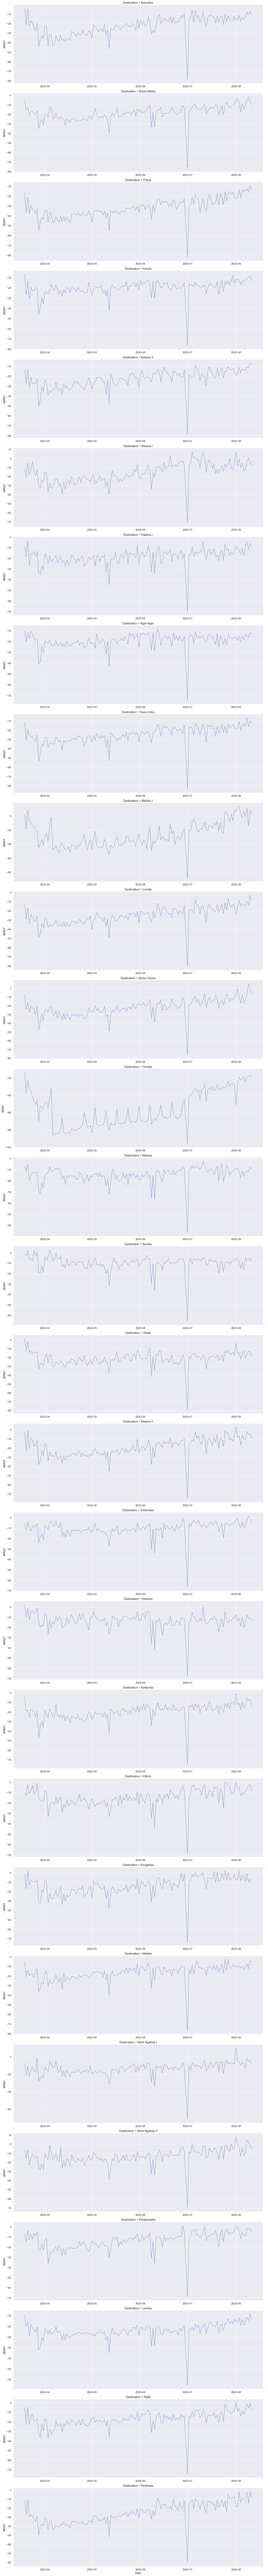

In [95]:
g = sns.FacetGrid(df_trend, row="Destination",aspect=3,height=6,sharey=False,sharex=False)
# g.map(sns.lineplot, x='Date',y='deltaV', alpha=.7)
g.map(plt.plot, "Date", "deltaV", alpha=.7)
# sns.lineplot(x='Date',y='deltaV',data=df_trend)
g.add_legend();

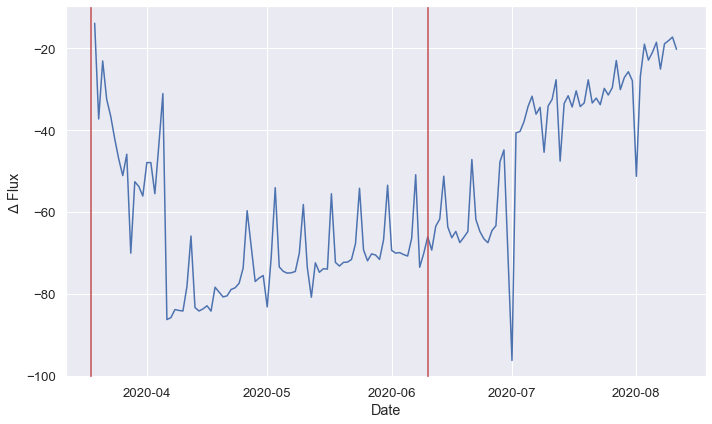

In [96]:
fig = plt.figure(figsize=(10,6))
ax = sns.lineplot(x='Date',y='deltaV',data=df_trend[df_trend.Destination == 'Gombe'])

# ax.set_xticklabels(labels = df_total_flux['Date'], rotation=90)
# ax.
ax.axvline('2020-03-18',ymin = 0, ymax = 1,color = 'r')
ax.axvline('2020-06-10',ymin = 0, ymax = 1,color = 'r')

ax.set(ylabel = '$\Delta$ Flux')
# ax.set_xticklabels(labels=,rotation=45)
# plt.xlim(0)
plt.tight_layout()
plt.show()